<a href="https://colab.research.google.com/github/danielsneala/Examples_of_Work/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import numpy as np # This package helps us in analyzing and breaking arrays.
import pandas as pd # This allows us to access packages to analyze data
import matplotlib.pyplot as plt # This assists in displaying visualizations and graphs.
import seaborn as sns # This package makes it so we can make visualizations.
%matplotlib inline 


import scipy.stats as stats # This package allows us to make statistical analysis.


sns.set()

#Splits the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# We load the data provided by ReCell
data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Shape of the data. Turns out that we have 3454 rows with 15 columns. 
data.shape

(3454, 15)

In [ ]:
# First 5 rows of the dataset. 
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


At initial glance, we see that the data contains phones were released in 2020, used for between 100 and 350 days, consists Andriod operating systems with the brand name 'Honor'. We also see that the used and new prices for the phones are relatively the same. We also see that the weight of the phones surprisingly vary, from 146 grams to 480 grams.

In [ ]:
# We check the types of data present in the dataset.
# We see that four columns are object based, two columns are integers,
# and the remaining nine columns are floats. The object columns
# are columns which identify the phone's brand name, operating system, and whether
# the phone is 4G or 5G. The two integer columns contains information regarding the
# phone's released year and for how many days was the phone being used. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

We see that four columns are object based, two columns are integers, and the remaining nine columns are floats. The object columns are columns which identify the phone's brand name, operating system, and whether the phone is 4G or 5G. The two integer columns contains information regarding the phone's released year and for how many days was the phone being used. 

In [ ]:
# We look at a statistical summary of the data. We transpose the index and the columns of the data
# by using the '.T' at the end of the describe() function and include all the variables. 
# We see that certain variables do not have any statistical summary and that's because they're categorical variables
# (brand_name, os, 4g, and 5g). 
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


We see that certain variables do not have any statistical summary and that's because they're categorical variables. We also note that screen size of the dataset has an average of 13.71 inches, which indicates that a majority of the devices in the dataset must be tablets (as it would be a feat to have a phone accessible in one's pocket!). We also see that the average device has 54.7 GB of memory, 4 GB of ram, and has a battery of 3133.40  

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

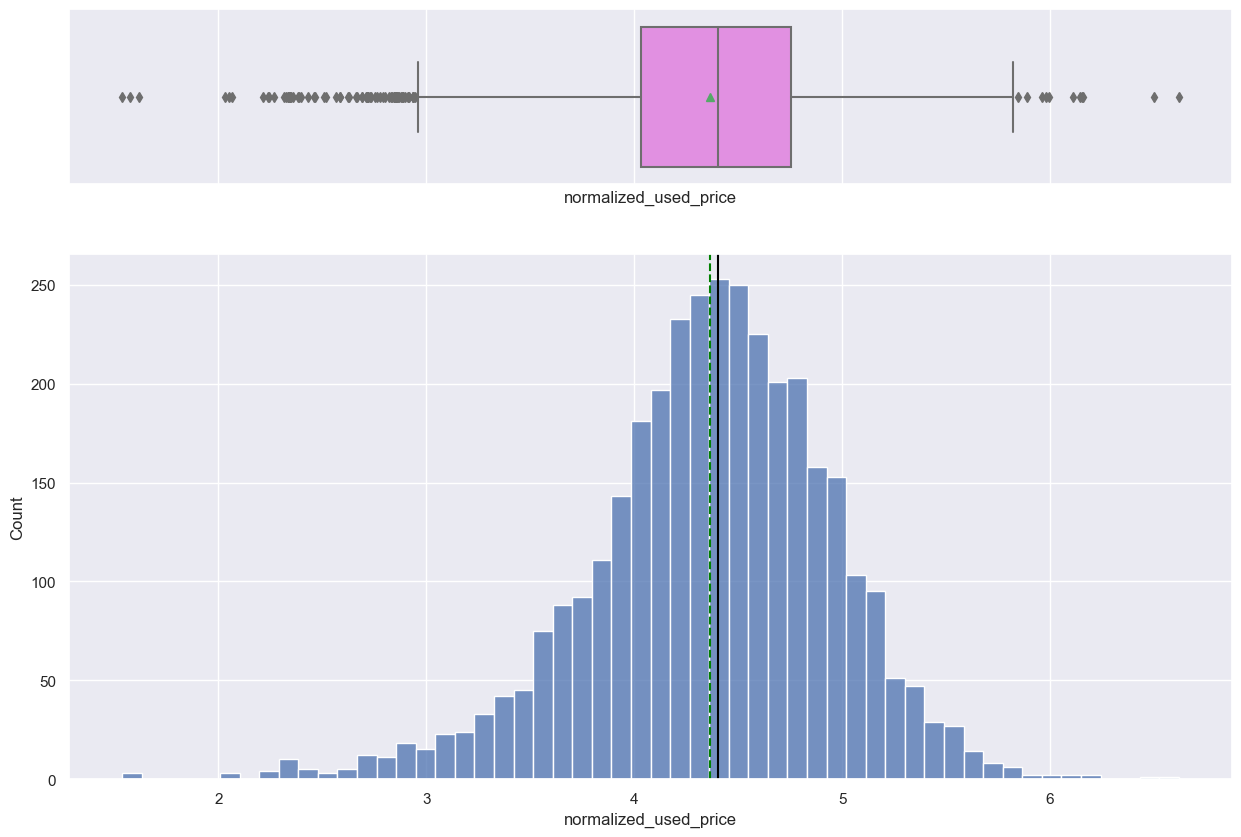

In [ ]:
# We could approach these problems in different ways.
# However, in making a series of graphs, we can better answer these questions.


# This function named 'histogram_boxplot' creates a boxplot and a histogram together, so we can 
# better observe the disribution of variables and better answer the above questions.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram




# We create a function named 'labeled_barplot' to produce a barplot with percentage at the top. 
def labeled_barplot(data, feature, perc=False, n=None):
 

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotates the percentage

    plt.show() 


# Using a prior function created, we create a histogram and boxplot plot, looking at the 'normalized_used_price' column
# in the imported dataset. 
histogram_boxplot(data, "normalized_used_price")



We see from the above graph that data appears to be normal but we notice that the median and the mean (average) are not the same and the distribution is slightly right skewed. We also notice that there are a series of outliers that are under 3 and slightly above 5. In reviewing the statistical summary, we can say that these outliers are lower than 1.536867 and higher than
4.7557.Using the table, we also see that the mean is 4.364712.

In the graph below, we see that approximately 93.1% of the data has an Andriod operating system.
We also see taht roughly 1 % of the data is uses an iOS while 1.9 % uses Windows. The remaining 4% of the data uses an
operating system that is none of the classic three types of operating systems. 

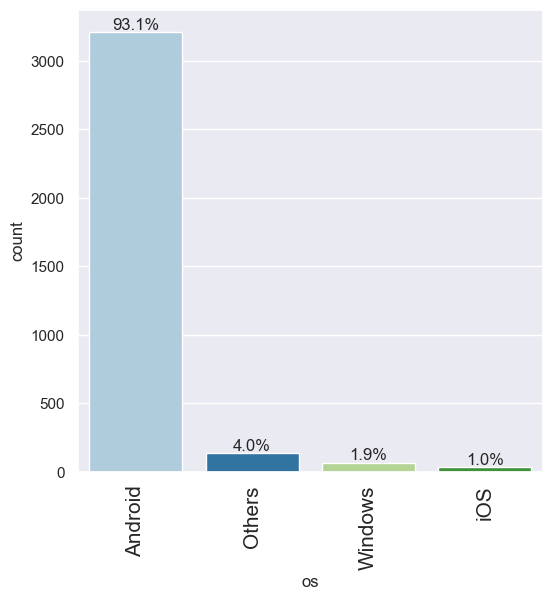

In [ ]:
# We use the labeled_barplot() function created above to display the percentages of the phone's operating systems. 
labeled_barplot(data, "os", perc=True)

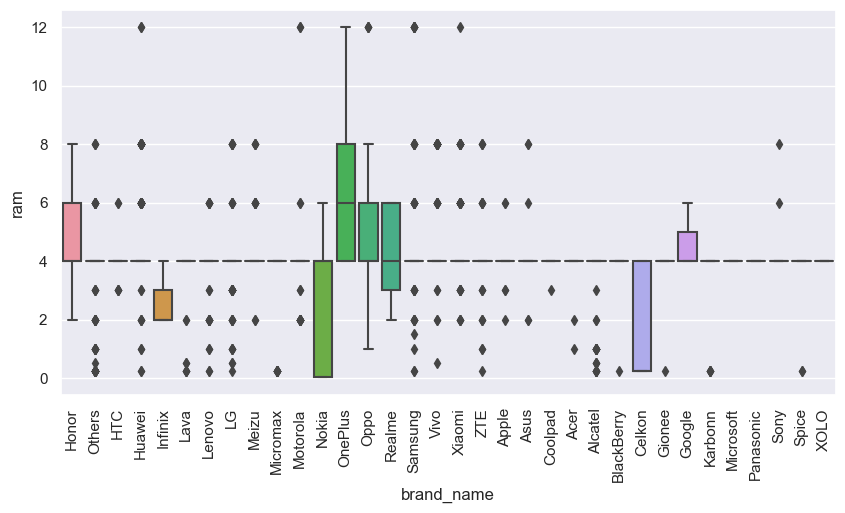

In [ ]:
# We specify the size of the graph to be in a rectangle shape, larger than the default setting.
plt.figure(figsize=(10, 5))
# We specify that we want a boxplot graph, which is formed using the data we imported earlier, with 'brand_name' as the
# value on the x-axis with 'ram' on the y-axis.
sns.boxplot(data, x="brand_name", y="ram")
# In order to better make out the values on the x-axis, we rotate the names 90 degrees.
plt.xticks(rotation = 90)
# We then display the graph with no coding messages.
plt.show()


From the graph, we have it that the OnePlus brand in general tends to have higher Ram than its competitors. 
Nokia, on the otherhand, tends to have low RAM storage, along with Celkon and Infinix.
We also see that only six brands have ram a range of RAM storage greater than 4 GB. 

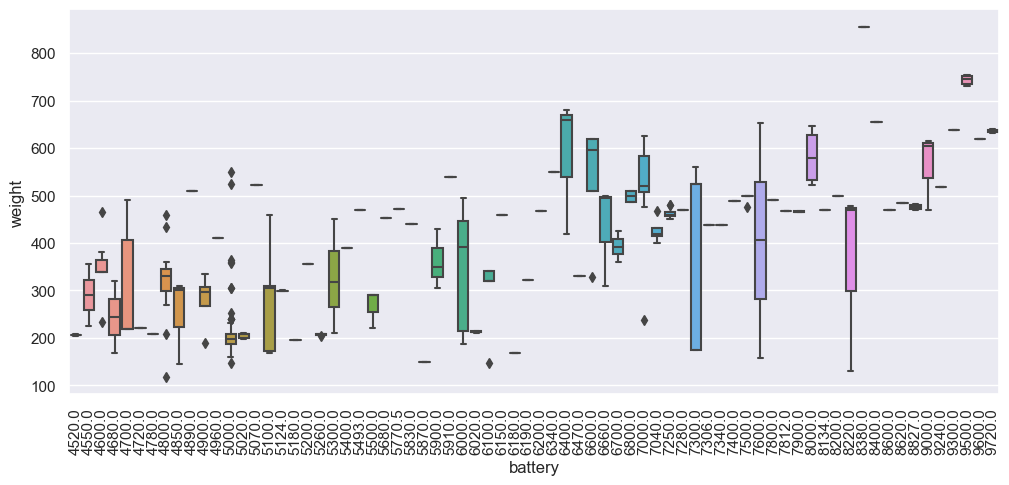

In [ ]:
# We create a sub-dataset named df4, which takes the imported dataset and and we specify that 
# the value in the 'battery' column to be greater than 4500. 
df4 = data[data['battery'] > 4500]

plt.figure(figsize=(12, 5))
# We create a boxplot using the df4 dataset, with 'battery' on the x-axis and 'weight' 
sns.boxplot(df4, x = 'battery', y = 'weight')
# We rotate the labels on the x-axis and rotate them 90 degrees 
plt.xticks(rotation = 90)
# Display the graph with no coding messages. 
plt.show()


We see that as the battery values increased, that the distributions of the device's weight increases. We also see that certain weights vary even on set battery capacities. For example, we see that if a battery has 6000 mAh, it can be as low as less than 200 grams and as high as 500 grams. We also notice that certain capacities have a wider distribution of weight than others. We also observe that devices with a battery capacity of 6000, 7300,and 7600 vary could be as less than 200 grams but all can be as much as 500 grams. 

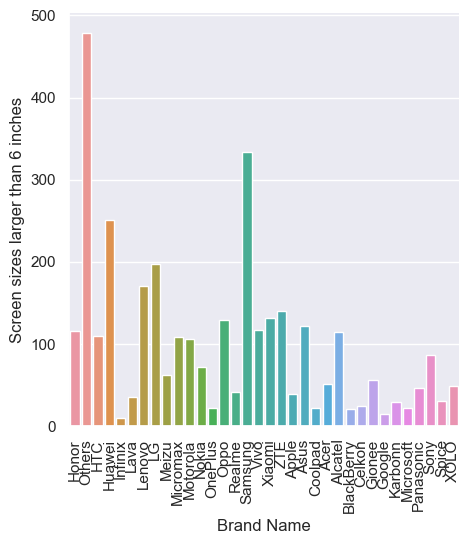

In [ ]:
# We copy the dataset and name it 'df3'
df3 = data.copy()

# We limit the subset data to only have cases where the 'screen_size' is greater than 6.
df3 = df3[df3['screen_size'] > 6]



# We create a bar chart, using the 'df3' dataset, specify that we want 'brand_name' on the x-axis.
sns.catplot(df3, x= 'brand_name', kind = 'count')
# We rotate the x-axis labels 90 degrees.
plt.xticks(rotation = 90)
# We label the y-axis
plt.ylabel("Screen sizes larger than 6 inches")
# We label the x-axis
plt.xlabel("Brand Name")
# We display the graph with no coding messages. 
plt.show()

From the graph above, we see that largest known brands that produces devices with a screen size larger than 6 inches is Samsung, Huawei, LG, and Lenovo (in that order). We also see that there's others brands that produces devices with large screen sizes but they're classified as "Others" in the dataset, so we don't know what brands they are. 
We also see that in the dataset, only fifteen brands have more than 100 devices that have a screen size larger than 6 inches. 

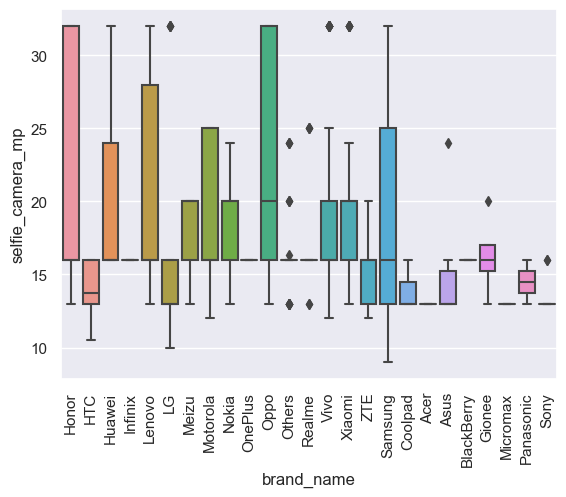

In [ ]:
# We make a subset of the data where the 'selfie_camera_mp' is to be greater than 8. 
df5 = data[data['selfie_camera_mp'] > 8]

# We create a boxplot graph to see whether the distribution of 'selfie_camera_mp' and 'brand_name'. 
# Taking the imported dataset, we have'brand_name' in the x-axis and 'selfie_camera_mp' in the y-axis. 
sns.boxplot(df5, x= 'brand_name', y= 'selfie_camera_mp')
# We rotate the labels in the x-axis so we can read the chart.
plt.xticks(rotation = 90)
# We label the x-axis
plt.xlabel("Brand name")
# Display the chart with no coding messages. 
plt.show()

We see that Honor, Lenovo, Oppo, and Samsung are the main companies that have wide distribution of devices that have a front camera that has a higher resolution than 8 MP. We also see that a significant number of the brands have distributions that rarely go beyond that of 10 MP. We also see that while some distributions go beyond 15 MP, they tend to be outliers of the brands. 

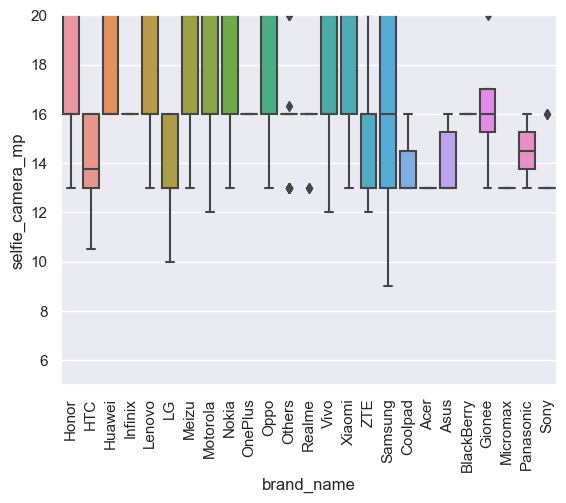

In [ ]:
# The first graph is difficult to make out, so we make a duplicate graph, but zoom in closer to where the 
# self_camera_mp is 8. 
sns.boxplot(df5, x= 'brand_name', y= 'selfie_camera_mp')
plt.xticks(rotation = 90)
# This line of code specifies that we're zooming in on the data, with the minimal value of self_camera_mp being 5 while the 
# maximum is 20. 
plt.ylim(5, 20)
# Displays the graph with no coding messages. 
plt.show()

We see from the graph that while 8 MP and above may be part of their distribution, they're more in the extreme.
We also see that the Oppo and Samsung brand have wide distribution of devices with a higher camera quality.  

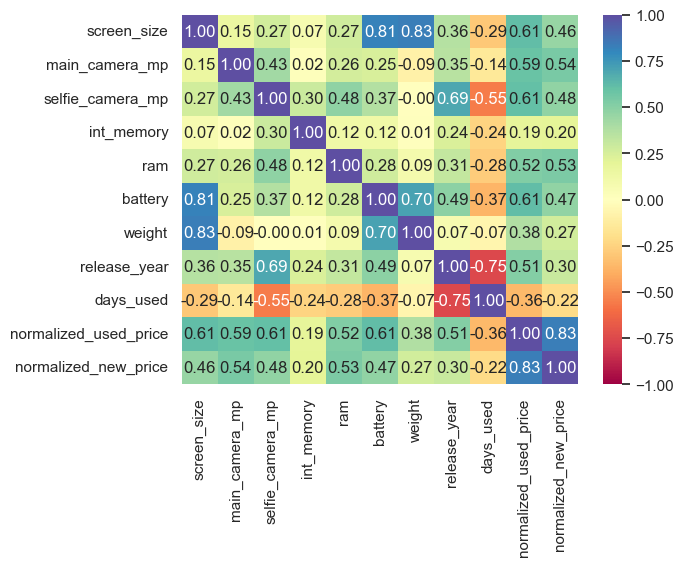

In [ ]:
# We create a list which looks at the data types of the columns and compilies based on whether they are numeric. 
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# We make a heat map, which takes the numeric columns, with annotations and the range of correlation is from -1 and 1.
# We also have the format of correlations be displayed with two decimal points. We also specify that cmap = "Spectral" 
#to specify the color range.
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# We display the graph with no coding messages. 
plt.show()

We see the normalised price of a new device is highly correlated with the price of the device used.
We also see that screen size ,battery life, and camera resolution (particularly the front camera) highly correlate with the price of used devices. The year of the release and rear camera resolution also correlate with used device price not as much as the other factors previously mentioned. 

From this graph, we also observe that weight and battery share positive correlation in association with screen_size. We also see that days_used, release_year and selfie_camera_mp have negative correlation with each other, which is logical. 

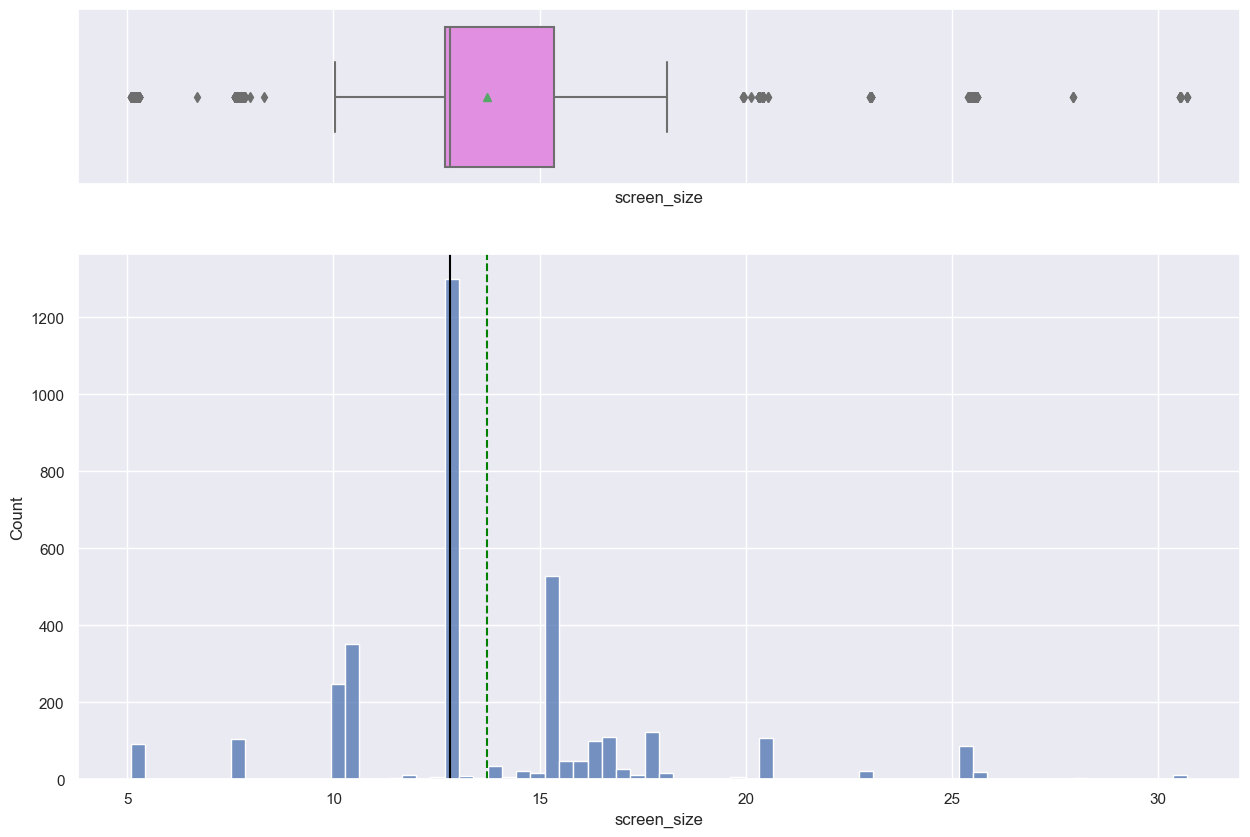

In [ ]:
# We make a histogram with a boxplot graph of the 'screen_size' variable. 
histogram_boxplot(data, 'screen_size')

We see that the screen size of the devices is right skewed. We also see that the mean is significantly more than the median. 

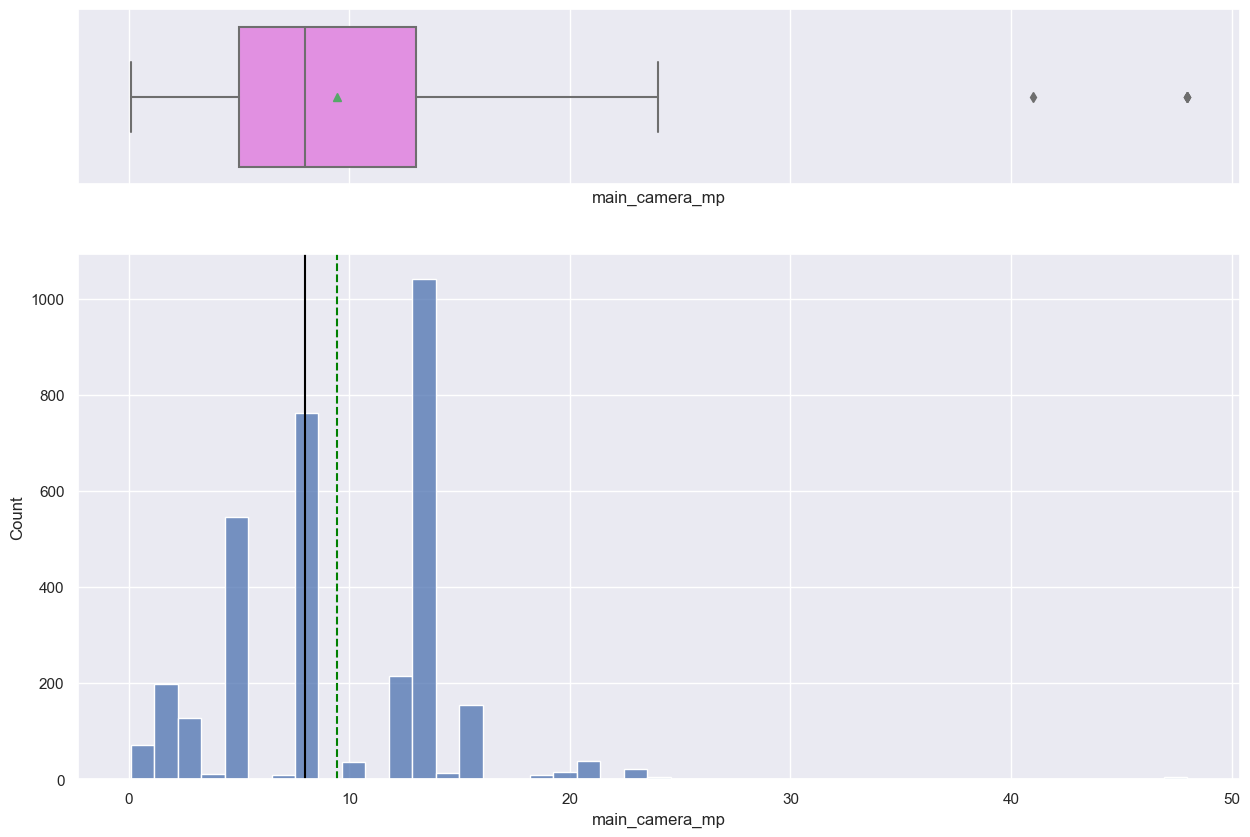

In [ ]:
# We create a combination of histogram and boxplot, looking at the 'main_camera_mp' variable in the dataset.  
histogram_boxplot(data, 'main_camera_mp')

From this graph, we see that there's a few outliers in the rear camera resolution and that the mean is higher than the median. 

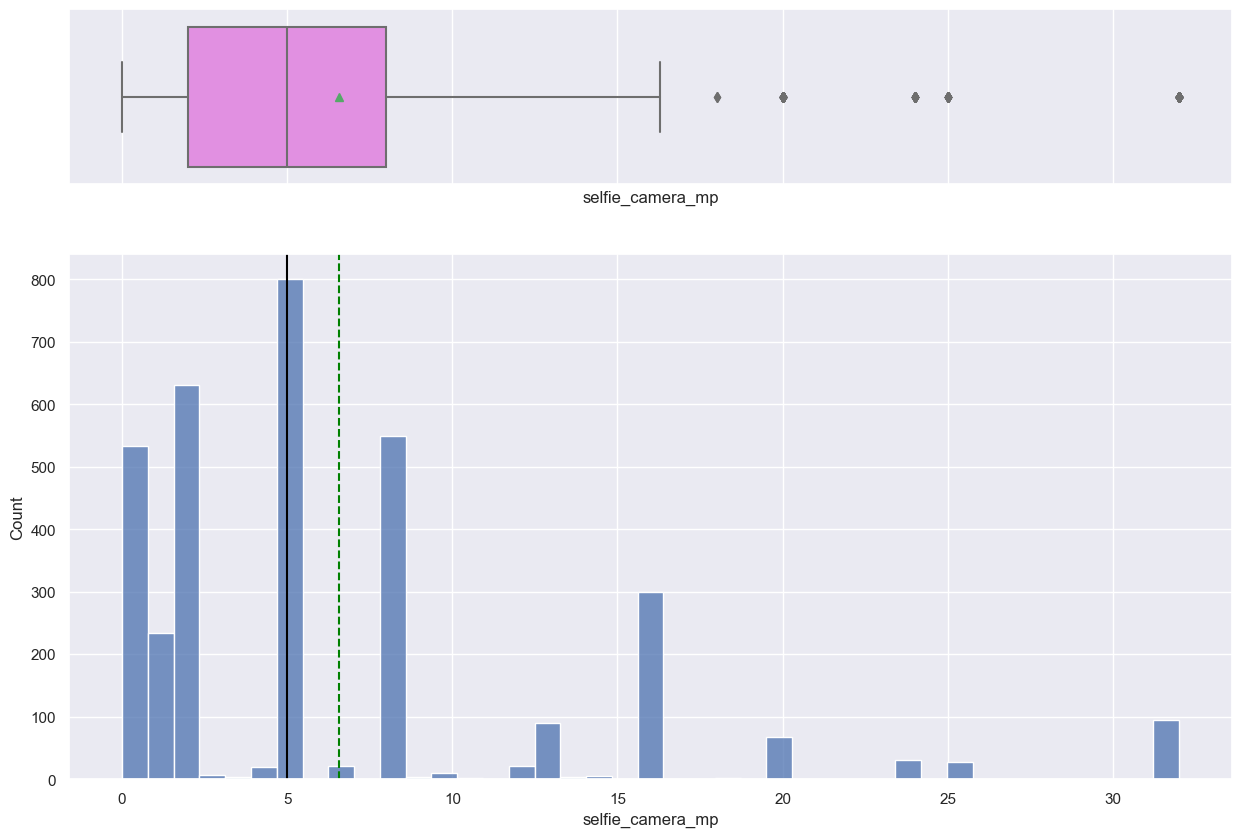

In [ ]:
# We create a combination of a histogram and boxplot graph, looking at the 'selfie_camera_mp' variable of the dataset. 
histogram_boxplot(data, 'selfie_camera_mp')

We see that the resolution of front cameras is left skewed and we also see that the median of the data is higher than the median. We also see that there are outliers of the front camera resolution. 

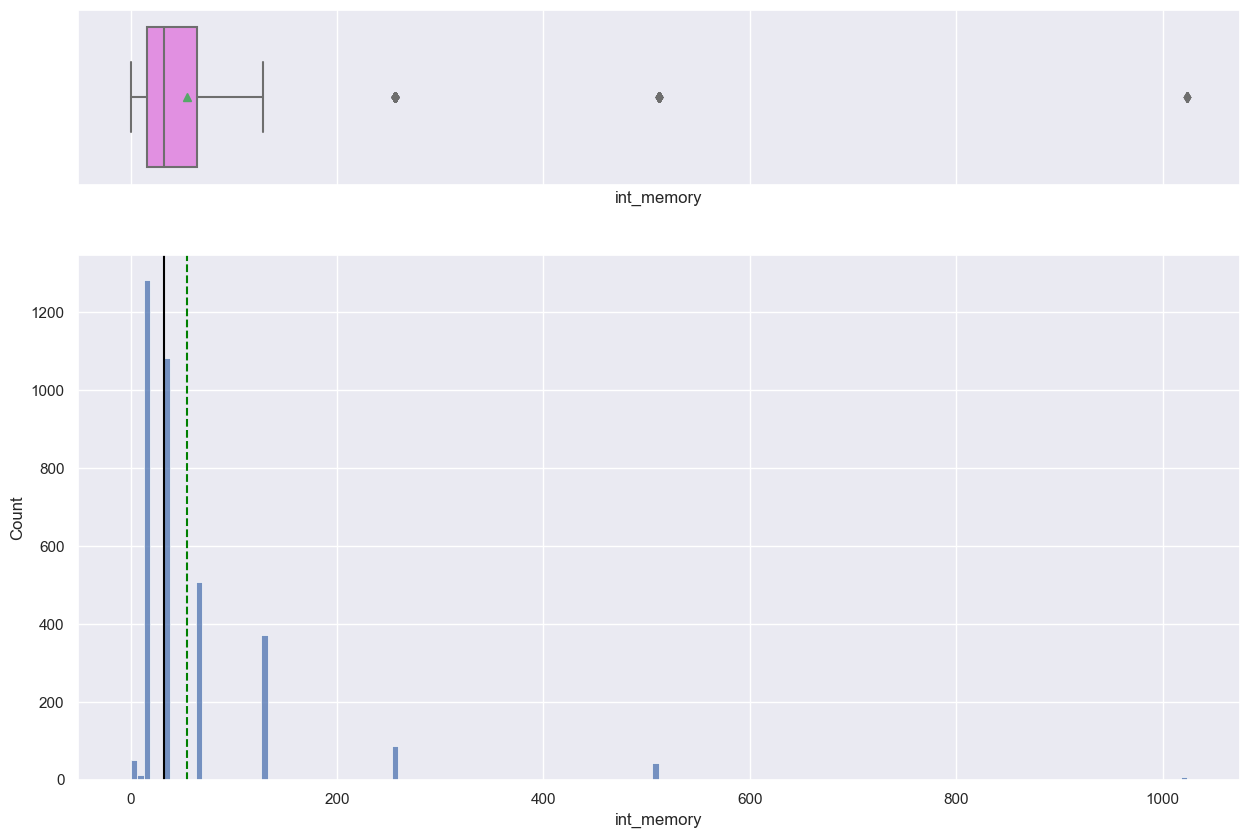

In [ ]:
# We make a combined graph of a histogram and boxplot of the internal memory of the devices. 
histogram_boxplot(data, 'int_memory')

We see that the internal memory is right skewed and there's three outliers. We also see the median is higher than the mean. We also see that the distribution of internal memory is relative small. 

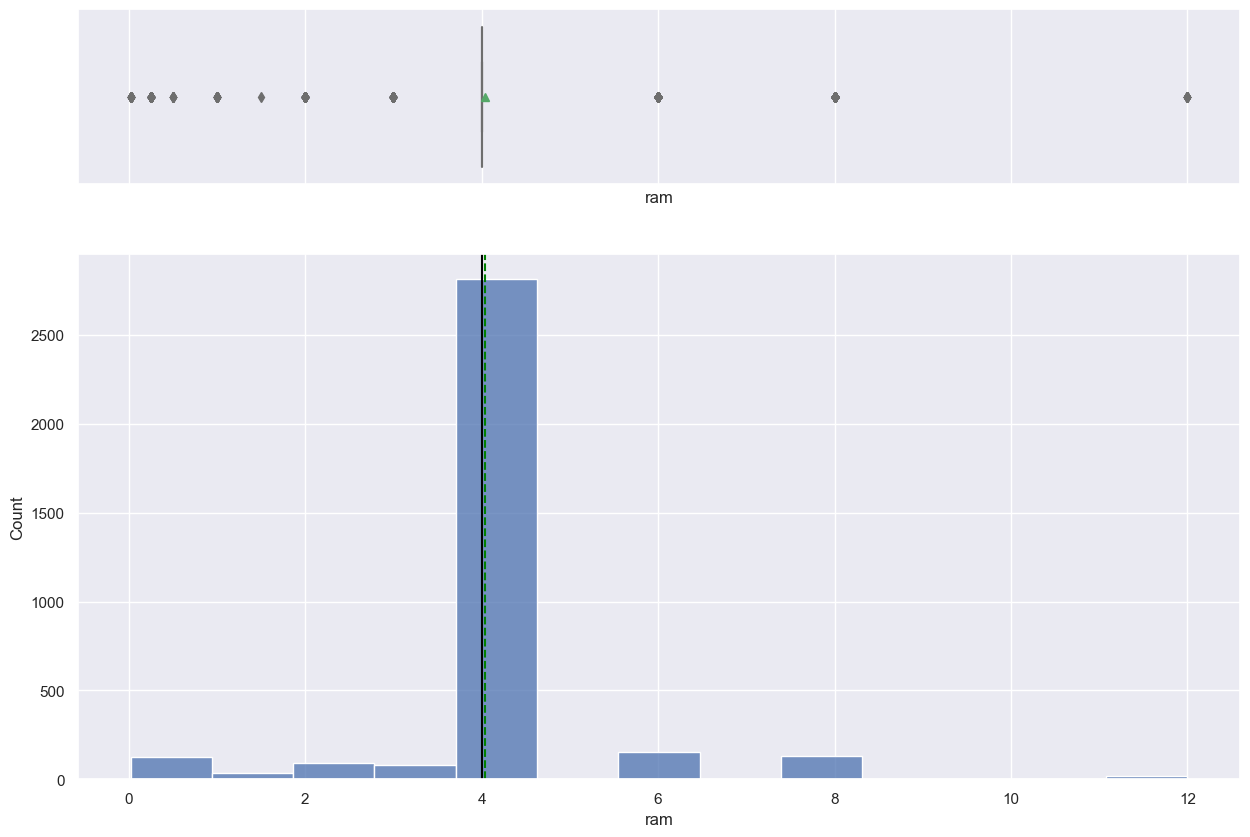

In [ ]:
# We use the histogram_boxplot function to look at the 'ram' variable distribution.
histogram_boxplot(data, 'ram')

In regards to RAM storage, we see that we have a median of 4 GB and that the mean is close to this as well. We also see that we have a wide distribution of RAM storage, which makes capping storage of devices difficult. 

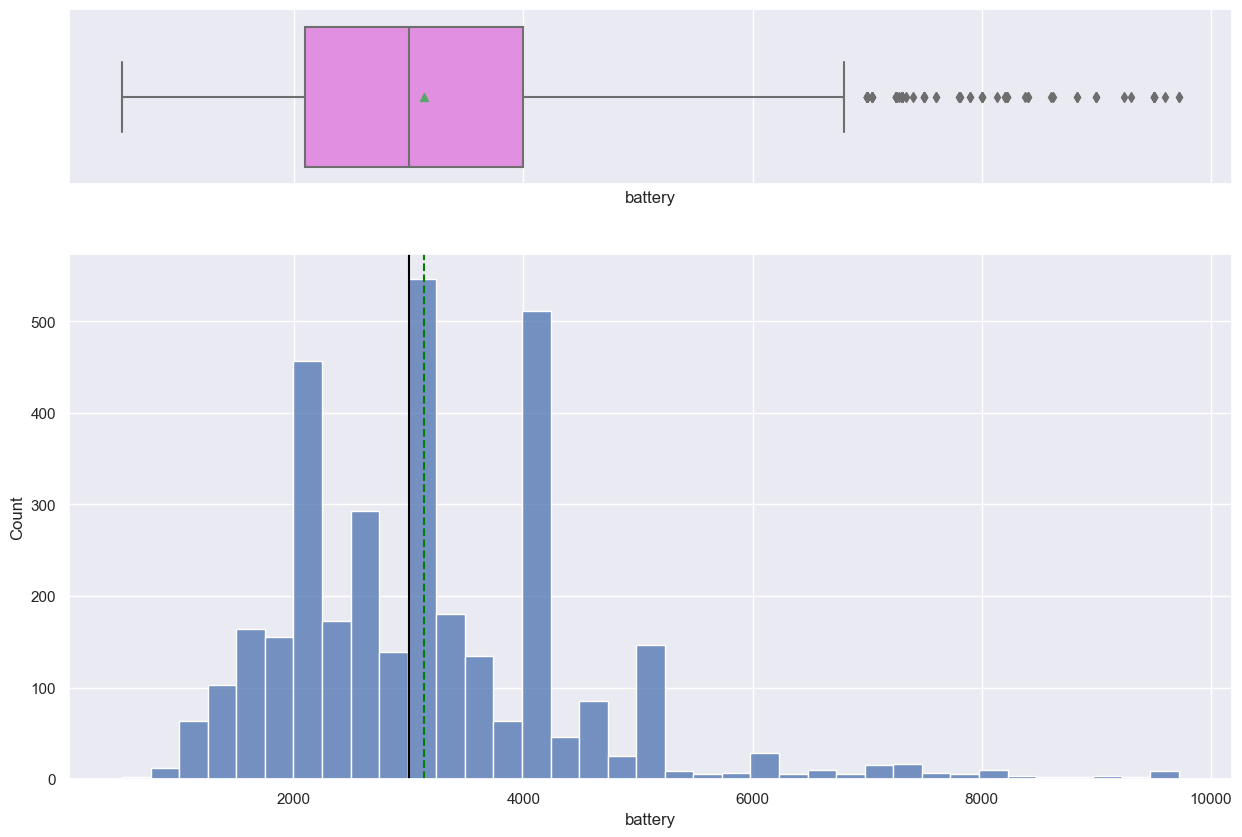

In [ ]:
# We create a histogram and boxplot graph of the variable 'battery'.
histogram_boxplot(data, 'battery')

For battery storage, we see that the mean is higher than the median and also has a lot of outliers. 

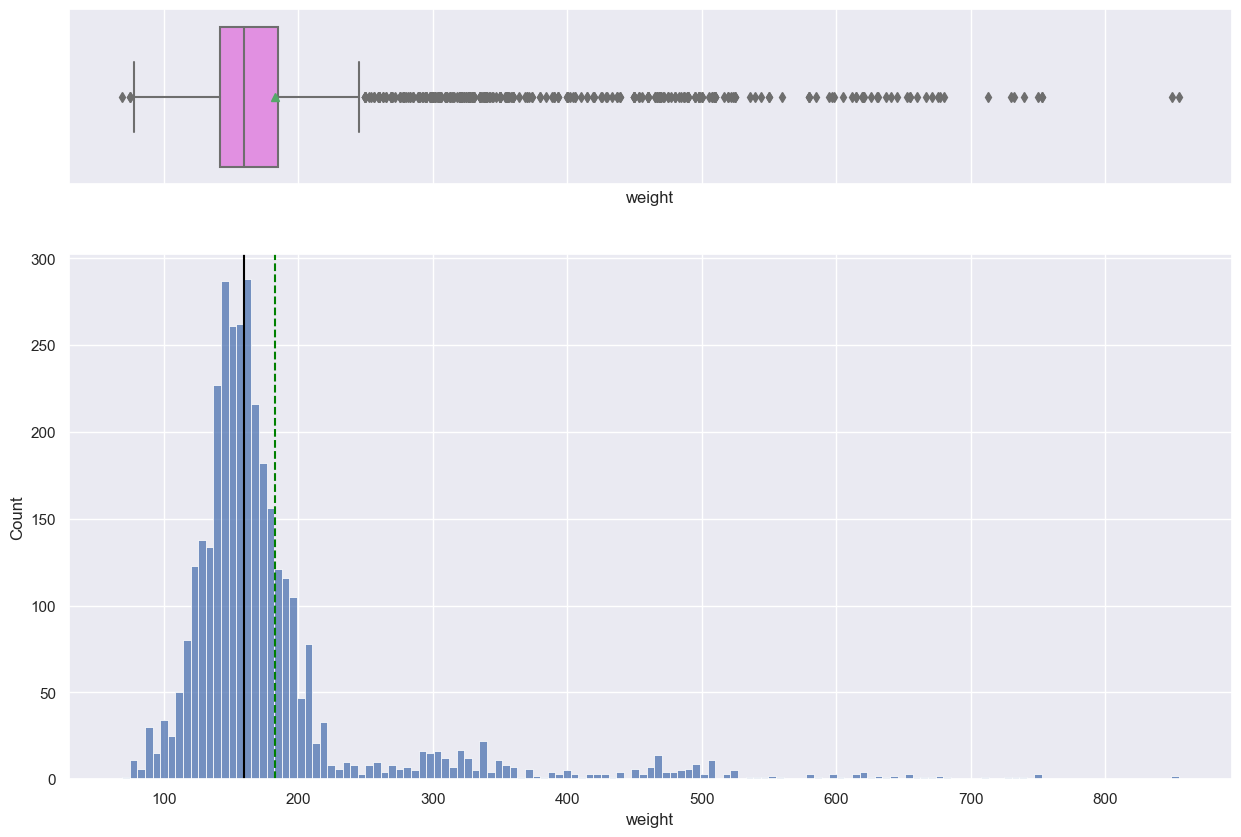

In [ ]:
# We use the histogram_boxplot function to look at the 'weight' distribution. 
histogram_boxplot(data, 'weight')

For the weight of a device, we see that it has a lot of outliers and the mean is signficantly higher than the median. 

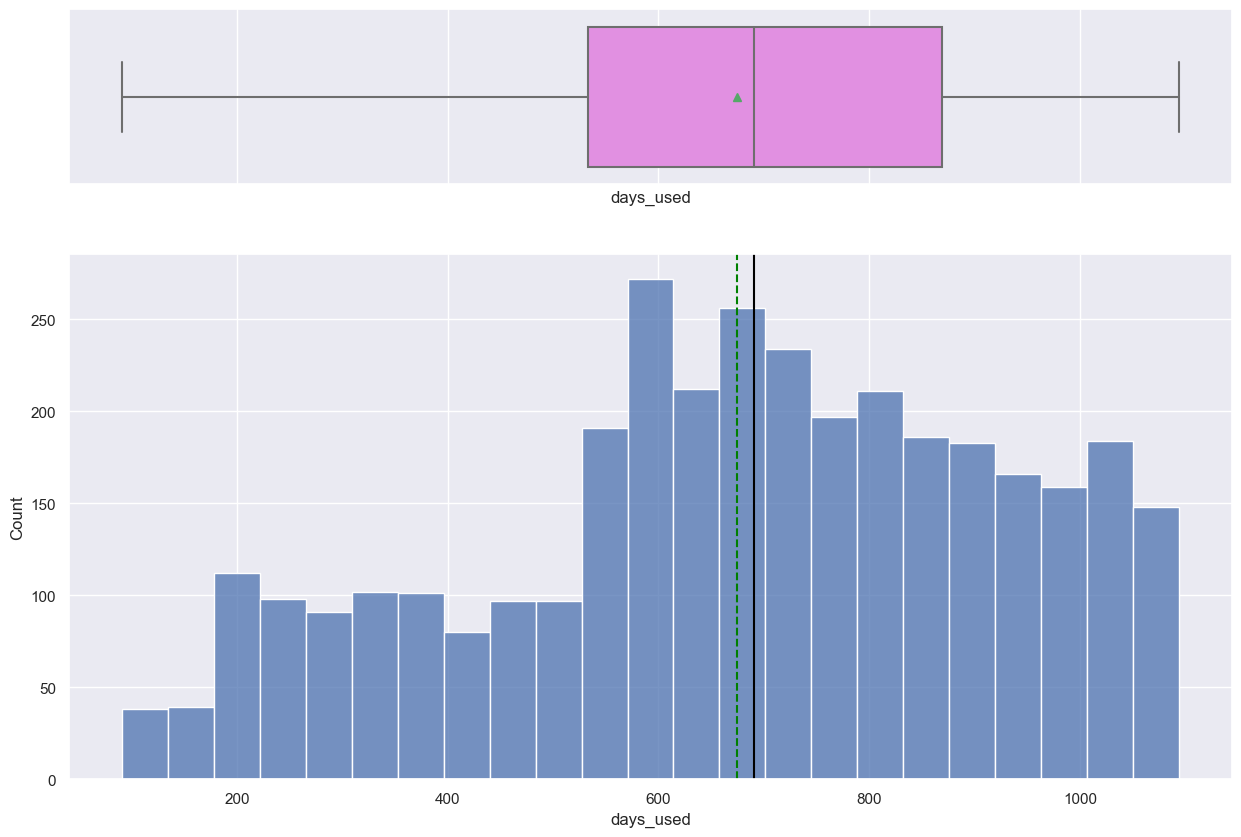

In [ ]:
# We look at the distribution of 'days_used' by using the histogram_boxplot() function
histogram_boxplot(data, 'days_used')

We see that the mean is less than the median and no outliers are to be seen. 

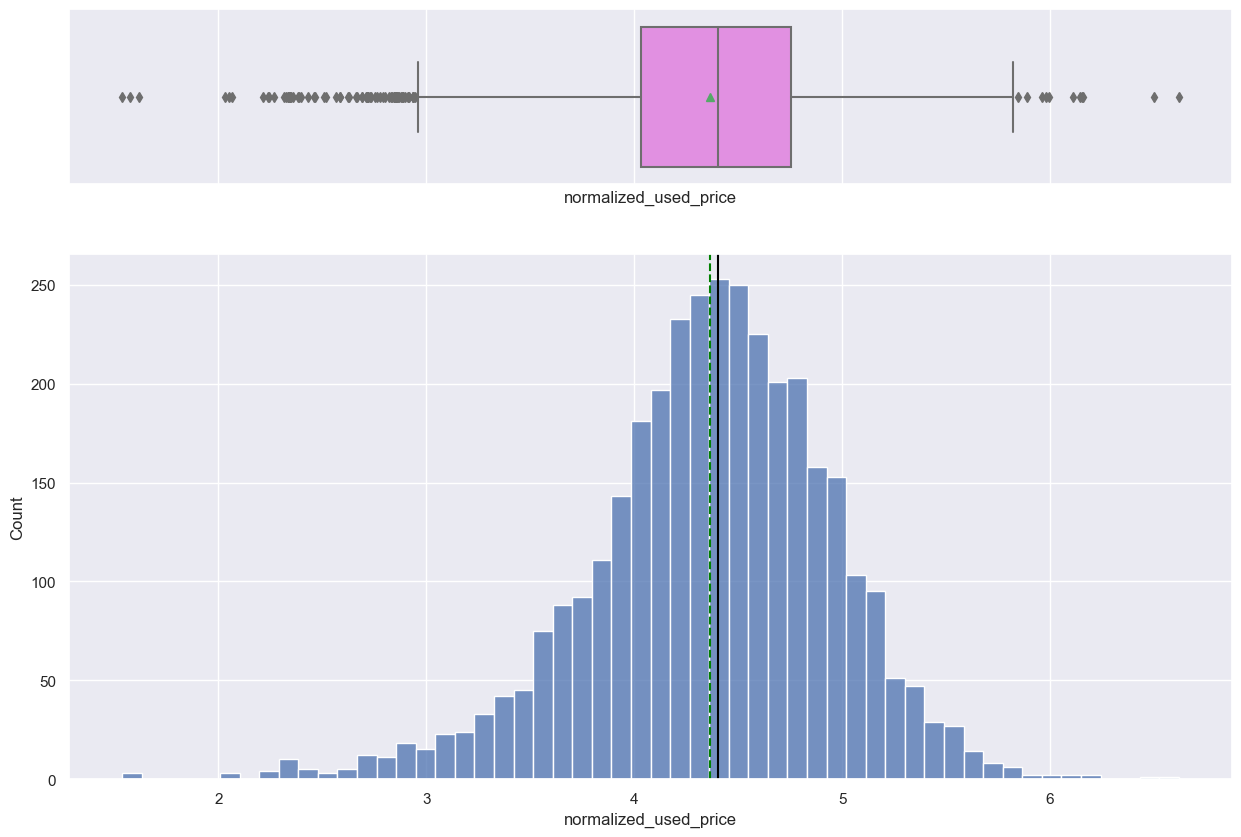

In [ ]:
# Using the histogram_boxplot() function to look at the 'normalized_used_price' column of the dataset. 
histogram_boxplot(data, 'normalized_used_price')

We see that there's some outliers on both ends of the distribution and we also see that the mean is slightly less than the median. 

In this graph, we see that median is seperated from the mean by almost a standard deviation. We also see that that there's a large quantity of outliers present, particularly in below the minimum value. 

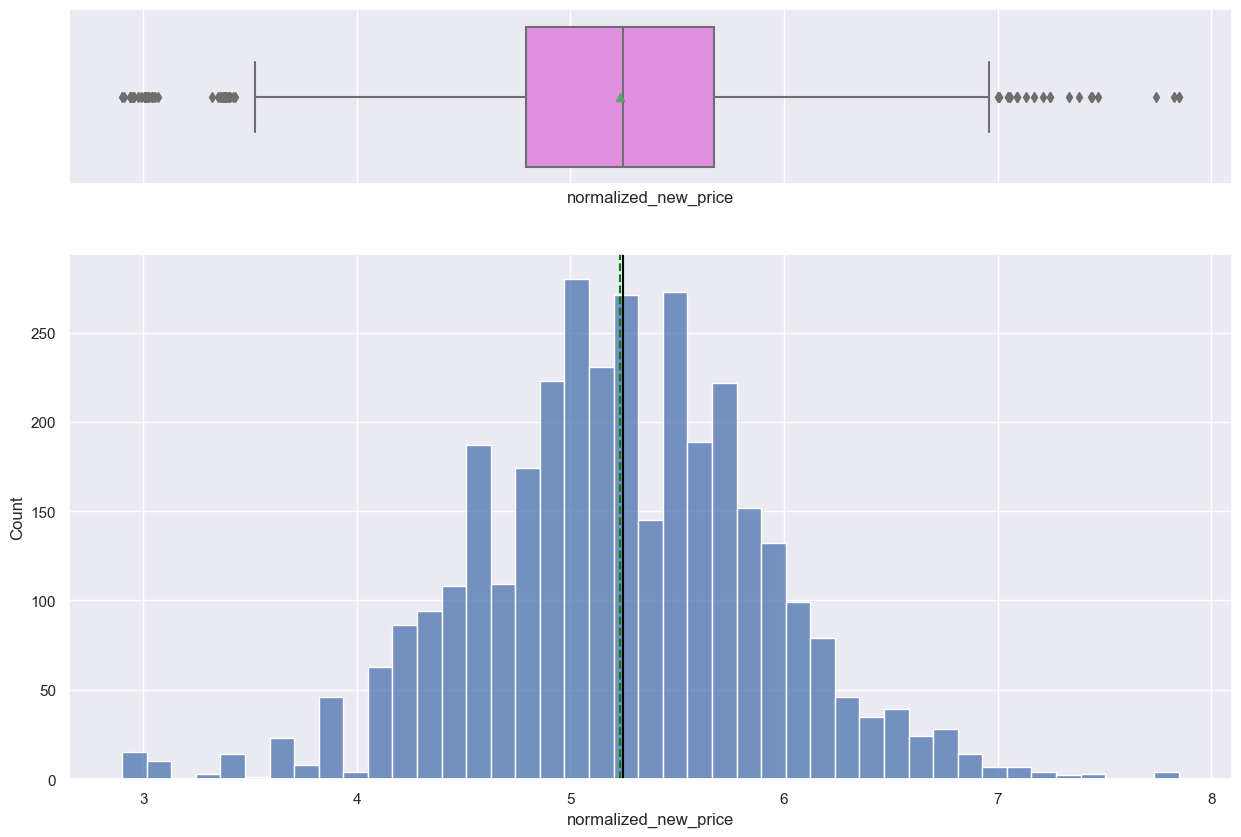

In [ ]:
# We look at the distribution of the 'normalized_new_price' variable using the histogram_boxplot() function. 
histogram_boxplot(data, 'normalized_new_price')

The chart indicates that mean and median of new devices are close to being the same, though the median is still higher than mean. We also see that there's some outliers, which will need to be eliminated later on before we do our linear regression. 

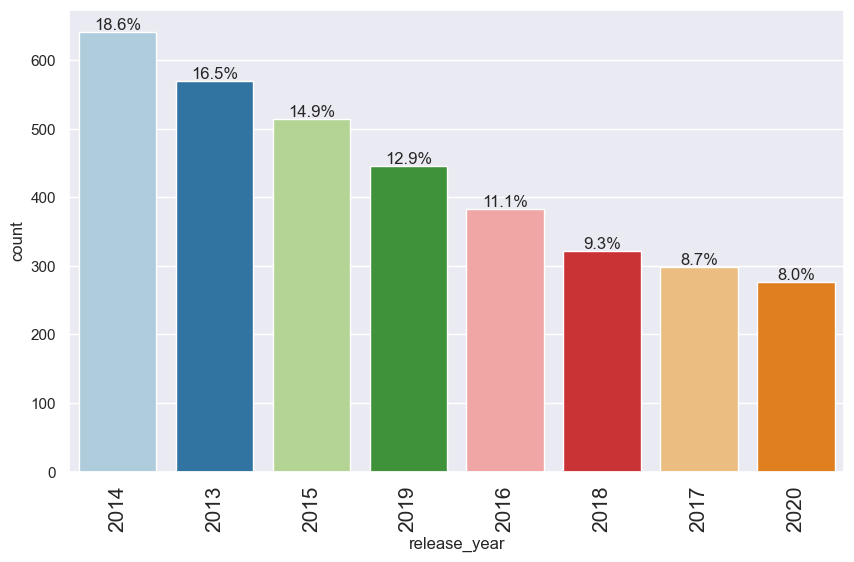

In [ ]:
# We use the labeled_barplot() function to get the percentages of the 'release_year' in the dataset. 
labeled_barplot(data, 'release_year', perc = True)

In looking at the data in the 'release_year' column but we see that fifty percent of the consists of devices issued from 2013 to 2015. We also see that thirty percent of the data consists of devices issued from 2017 to 2019. 

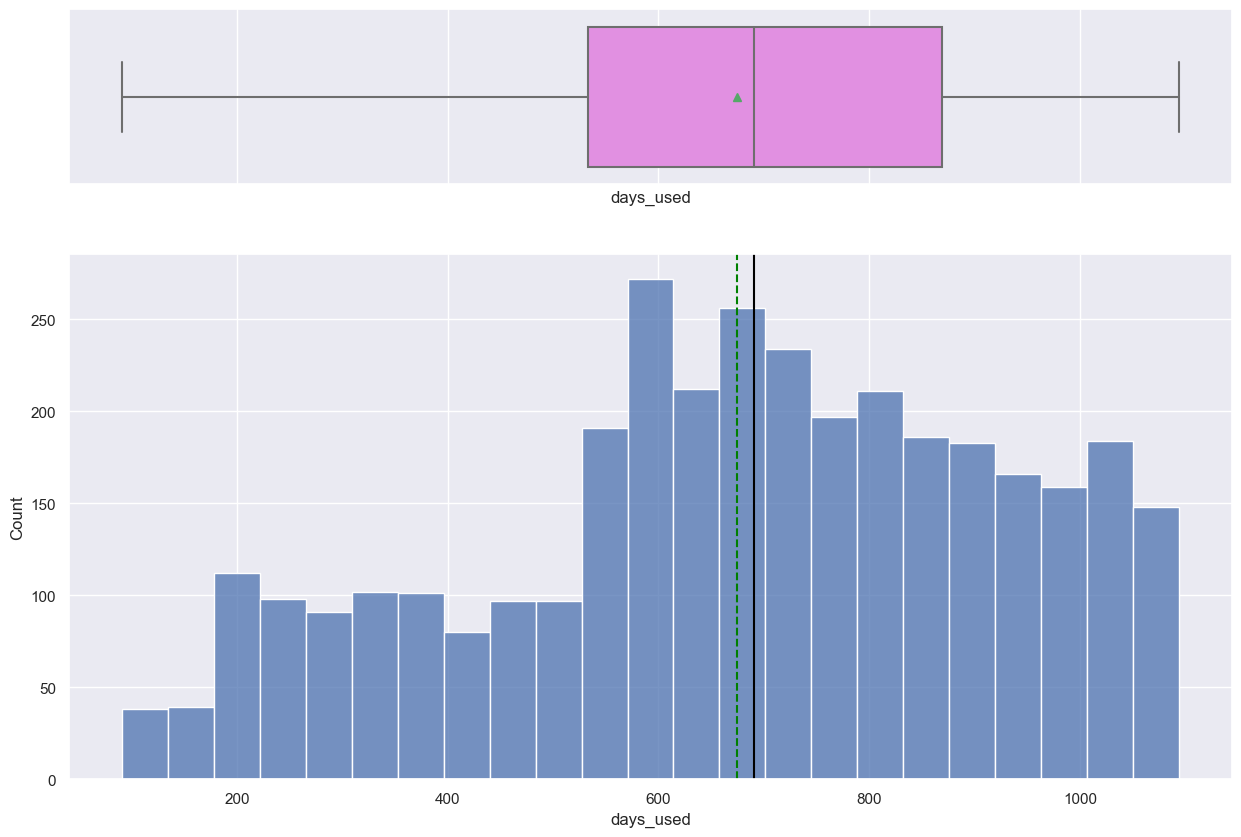

In [ ]:
# We use the histogram_boxplot() function to look at the distribution of the 'days_used' variable. 
histogram_boxplot(data, 'days_used')

We see that the mean of the days of a device being used is less than the median, both of which exceed 600 days. We also see that the data is left skewed. 

In [ ]:
# We create a cross table of two of the variables of the data: '4g' and '5g'.
pd.crosstab(data['4g'], data['5g'])

5g,no,yes
4g,,
no,1119,0
yes,2183,152


From this dataset, we see that 1119 devices are not 5g nor 4g. We also see that 2183 of the devices that do use 4g while 152 devices are compatiable with 4G and 5G. 

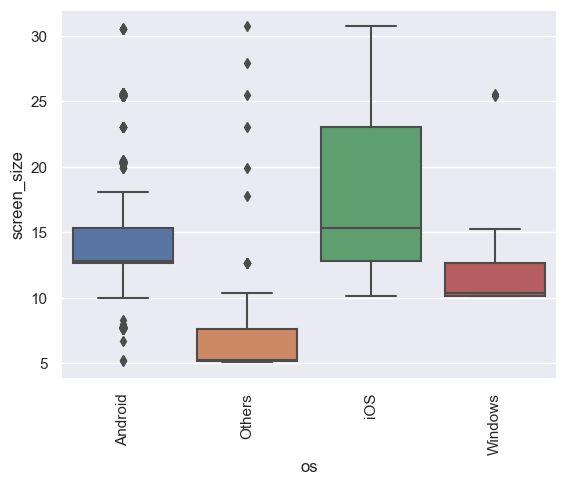

In [ ]:
# We use the boxplot function, with the 'os' on the x-axis and the 
# 'screen_size' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'screen_size')
# We rotate the marks on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# We show the graph with no coding messages. 
plt.show()

We see that the majortiy of devices operating with an Andriod system tend to have a screensize between 10 and approximately 18 inches in size. We also see that devices with an iOS operating system tends to have a larger distribution of screen size and a higher average as well. Systems with a Windows system rarely have a screensize larger than 15 inches and has an average closer to 10 inches. 

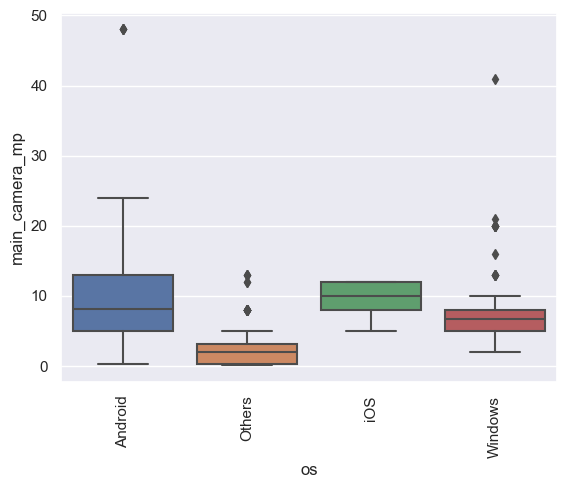

In [ ]:
# We create a boxplot graph, with the 
# 'os' on the x-axis and 'main_camera_mp' on the y-axis.
sns.boxplot(data , x = 'os', y = 'main_camera_mp')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# We display the graph with no coding messages. 
plt.show()

The rear camera resolution for devices using the iOS system has a larger mean than  its competitors but the distribtuion of camera resolution is higher for devices that use the Andriod system. We also see that Windows systems has a mean relatively close to that the Andriod operating systems. 

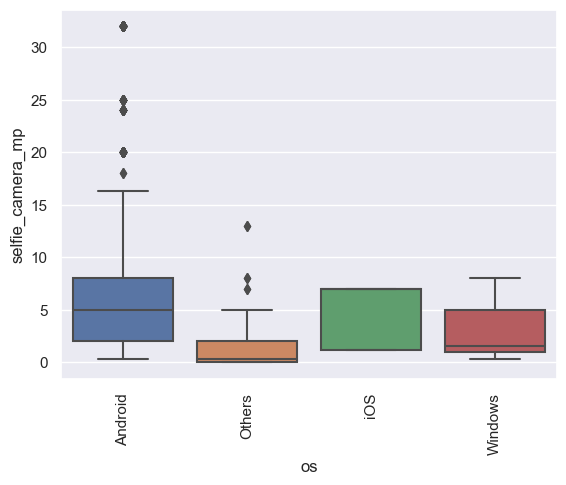

In [ ]:
# We create a boxplot graph, with 'os' on the x-axis and 'selfie_camera_mp' on the y-axis.
sns.boxplot(data , x = 'os', y = 'selfie_camera_mp')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages. 
plt.show()

We see that the front camera resolution tends to have a higher mean and larger distribution than its competitors. We also see devices with a Windows system has a larger distribution than iOS systems. We also see that Others operating systes has the lowest mean of all the operating systems. 

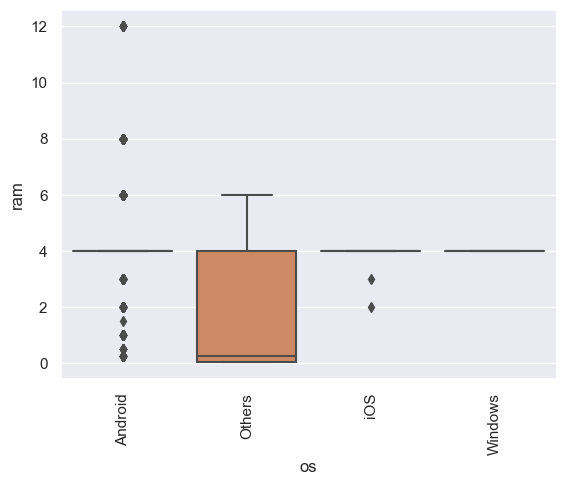

In [ ]:
# We craeate a boxplot, with 'os' on the x-axis and 'ram' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'ram')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We see that the RAM storage is relatively the same for three of the four operating system types. We also see that systems with other operating systems has the lowest mean yet has the widest distribtuion (without taking in account of outliers). 

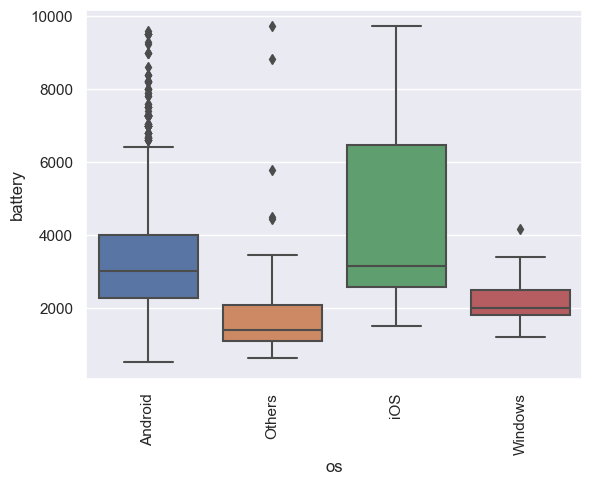

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'battery' capacity on the y-axis. 
sns.boxplot(data , x = 'os', y = 'battery')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We see that iOS operating systems has a largest battery capacity distribution and its mean competes with that of Andriord operating systems. We also see that the battery capacity of Windows operating systems has a lower mean than Andriod and iOS systems but is still higher than Other operating systems. 

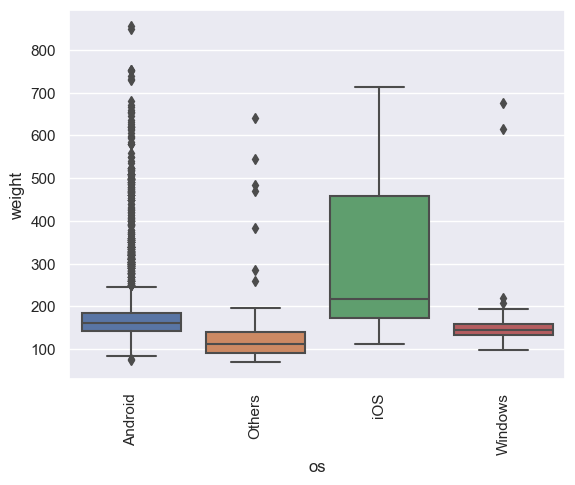

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'weight' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'weight')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We also see that iOS systems have a higher weight mean and larger distribution than its competitors. We also see that devices with an Andriod system is slightly higher than Windows. We also see that three of the four distributions have outliers while iOS doesn't have any outliers. 

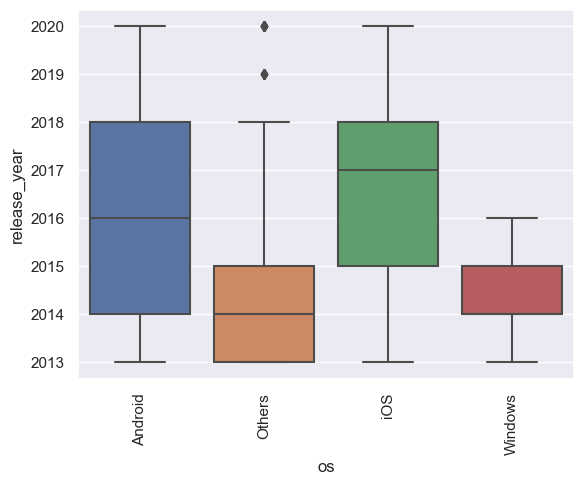

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'release_year' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'release_year')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We see that Windows devices in the dataset only goes from 2013 to 2016. We also see that that iOS and Andriod operating systems in the dataset have the largest time range, but iOS devices tend to be at 2017 and Andriod devices at 2016. 

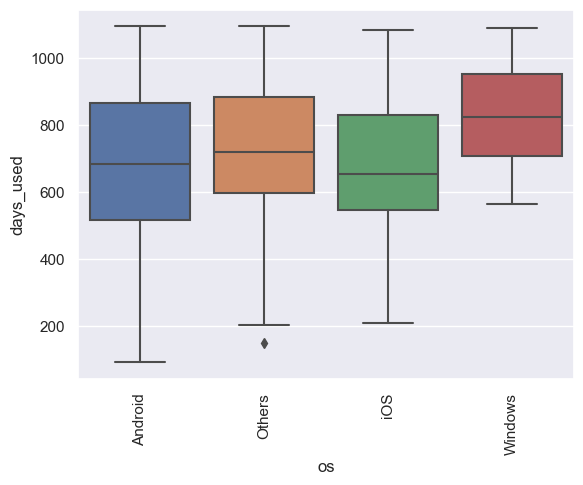

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'days_used' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'days_used')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We see that many devices with an iOS operating system surprising has the lowest number of days of the refurbished device has been used. We also see that a refurbished device with a Windows operating system will be used more than its competitors, though its distribution is smaller than its competitors. 

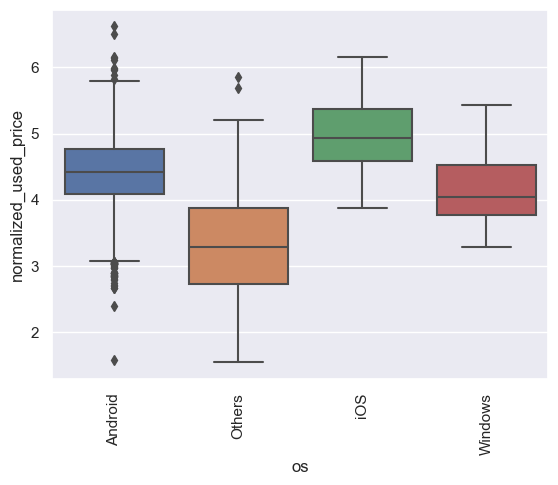

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'normalized_used_price' on the y-axis. 
sns.boxplot(data , x = 'os', y = 'normalized_used_price')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

From the above graph, we see that while Other operating systems have a wider distribution, its mean of normalized used prices is lower than its competitors. We also see that iOS has a higher mean of used prices, followed by Andriod and Windows. 

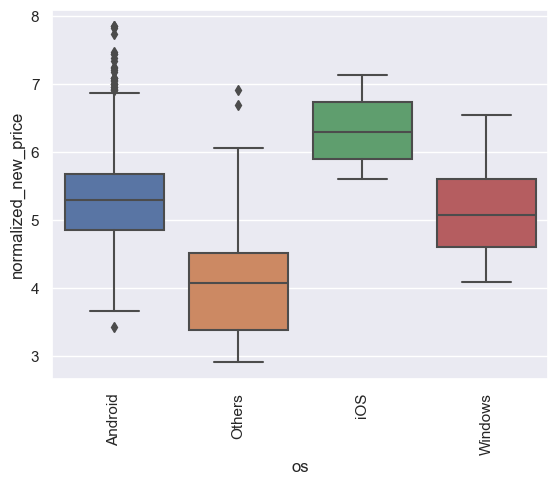

In [ ]:
# We create a boxplot graph with 'os' on the x-axis and the 'normalized_new_price' on the y-axis.
sns.boxplot(data , x = 'os', y = 'normalized_new_price')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

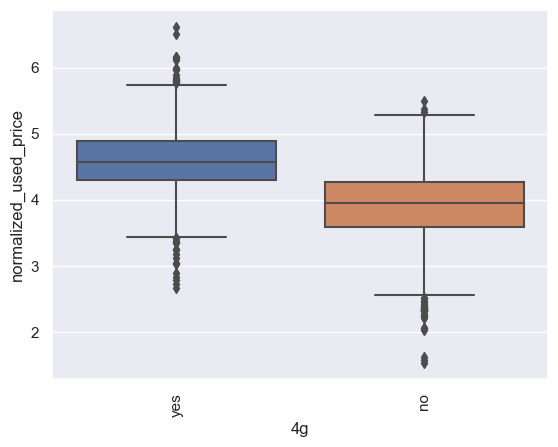

In [ ]:
# We craeate a boxplot, with '4g' on the x-axis and 'normalized_used_price' on the y-axis. 
sns.boxplot(data , x = '4g', y = 'normalized_used_price')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

We see that the median of normalized used prices is higher for 4g, than for devices that do not use 4g. We also see that the distribution of cases that don't use a 4g network is slightly larger than that that do use 4g. 

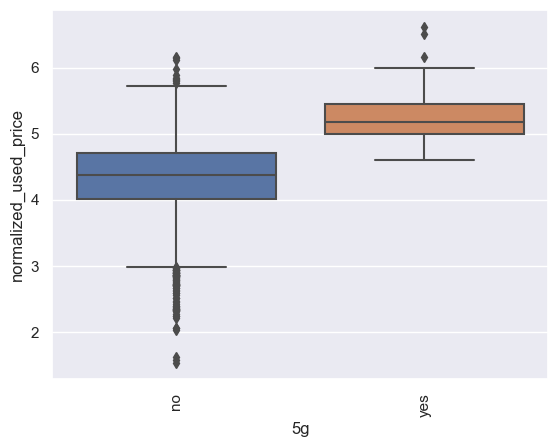

In [ ]:
# We create a boxplot, with '4g' on the x-axis and 'normalized_used_price' on the y-axis. 
sns.boxplot(data , x = '5g', y = 'normalized_used_price')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

From this graph, we see that the normalized used price median is higher for those devices that use a 5g network than those that do not. We also see that the distribution of cases with 5g is smaller than the distribution of devices that do not use 5g. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# We take a look at how many missing values are present in each column.
# The first thing that stands out is that a large majority of missing values
# are present in the 'main_camera_mp' column.
data.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# We make a copy of the data to avoid making direct changes to the read-in data
df = data.copy()

# We see that we have 179 out of 3454 rows with missing values in the main_camera_mp column, while
# a few other columns only go as high as 7 in terms of missing values. 

# We make a subset named 'df4' where we drop cases where the value is missing. 
df4 = df.dropna()

# We look at the shape of 'df4' and see that we lost 201 rows in cleaning the data.
df4.shape

(3253, 15)

In [ ]:
# We create a function named 'treat_outliers' to help us remove outliers. 
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

# We create a dataset named 'df5' which takes the 'df4' dataset in the treat_outliers function to treat 
# the 'normalized_used_price' column.
df5 = treat_outliers(df4, 'normalized_used_price')



C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# In the above graph we see that it did happen, so now we need to apply to the same principle to all the other columns.


# We create a dataset named 'df6' which takes the 'df5' dataset in the treat_outliers function to treat 
# the 'screen_size' column
df6 = treat_outliers(df5, 'screen_size')


C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# We create a dataset named 'df17' which takes the 'df6' dataset in the treat_outliers function to treat 
# the 'main_camera_mp' column
df17 = treat_outliers(df6, 'main_camera_mp')

# We create a dataset named 'df7' which takes the 'df17' dataset in the treat_outliers function to treat 
# the 'selfie_camera_mp' column
df7 = treat_outliers(df17, 'selfie_camera_mp')


C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# We create a dataset named 'df8' which takes the 'df7' dataset in the treat_outliers function to treat 
# the 'weight' column
df8 = treat_outliers(df7, 'weight')


C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# We create a dataset named 'df9' which takes the 'df8' dataset in the treat_outliers function to treat 
# the 'battery' column
df9 = treat_outliers(df8, 'battery')


C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# We create a dataset named 'df10' which takes the 'df9' dataset in the treat_outliers function to treat 
# the 'normalized_new_price' column
df10 = treat_outliers(df9, 'normalized_new_price')

C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# We create a dataset named 'df11' which takes the 'df10' dataset in the treat_outliers function to treat 
# the 'normalized_used_price' column
df11 = treat_outliers(df10, 'int_memory')



C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_13620\2394002385.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)


In [ ]:
# Outliers for RAM when its zero. 

df12 = df11[df11['ram'] != '0']


df12.shape # 3253

#data.shape #3454

(3253, 15)

In [ ]:
# We check to see if there are duplicate rows in the remaining dataset, which in this case, comes out to 0. 
df12.duplicated().sum()

0

## EDA

- It is a good idea to explore the data once again after manipulating it.

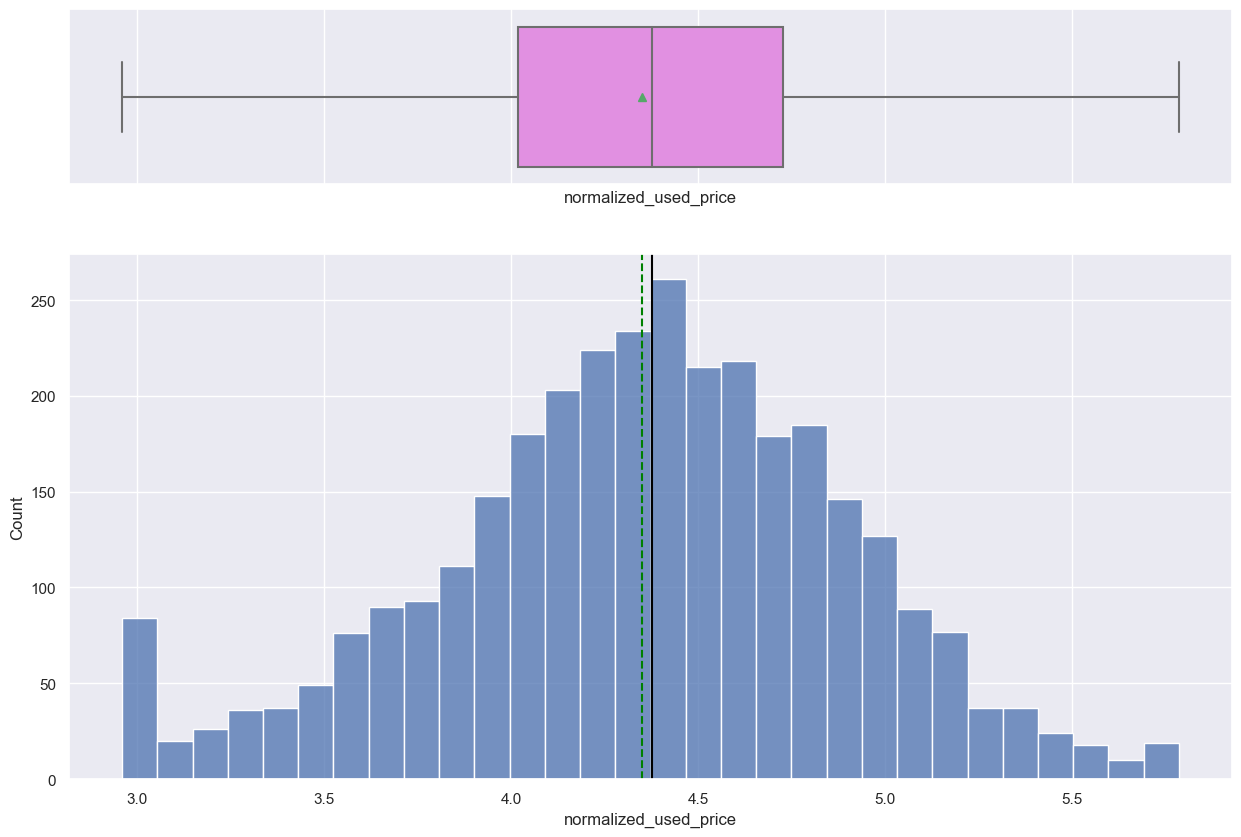

In [ ]:
# We use the histogram_boxplot function to look at the 'normalized_used_price' variable of our cleaned dataset.
histogram_boxplot(df12, "normalized_used_price")

We removed the outliers in the normalized used price but the mean and median haven't seem to change. However, we do see that the shape of the distribution has changed and the range has changed as well. 

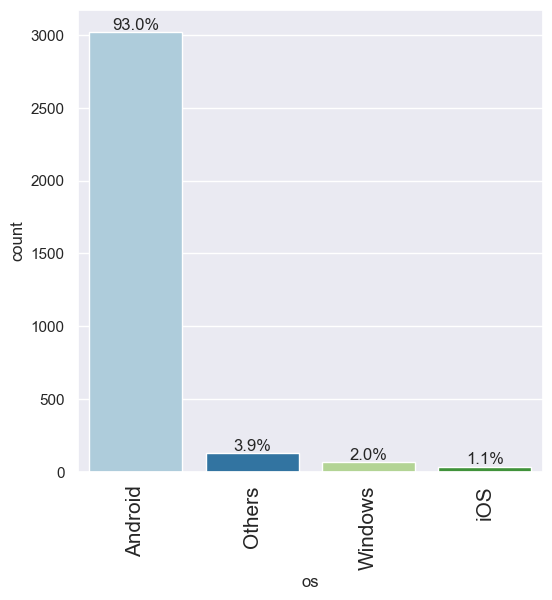

In [ ]:
# We use the labeled_barplot function to look at the percentages of the 'os' column of the cleaned dataset, df12. 
labeled_barplot(df12, "os", perc=True)

We see that while the data has been cleaned, the percentages of each operating system has only changed by as much as 0.1%. What is interesting that it altered all the operating system percentages and not just two or three. 

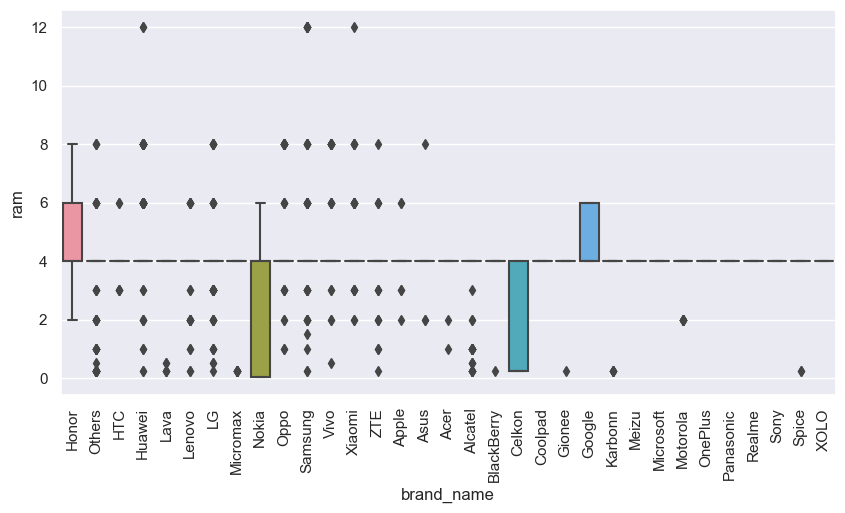

In [ ]:
# We specify the size of the graph to be in a rectangle shape, larger than the default setting.
plt.figure(figsize=(10, 5))
# We specify that we want a boxplot graph, which is formed using the data we imported earlier, with 'brand_name' as the
# value on the x-axis with 'ram' on the y-axis.
sns.boxplot(df12, x="brand_name", y="ram")
# In order to better make out the values on the x-axis, we rotate the names 90 degrees.
plt.xticks(rotation = 90)
# We then display the graph with no coding messages.
plt.show()

We see that the ram distribution of each brand has virtually vanished into outliers, with only four exceptions:Honor, Nokia, Celkon, and Google.Interestingly, we don't see the median of any of this brands. 

<AxesSubplot: >

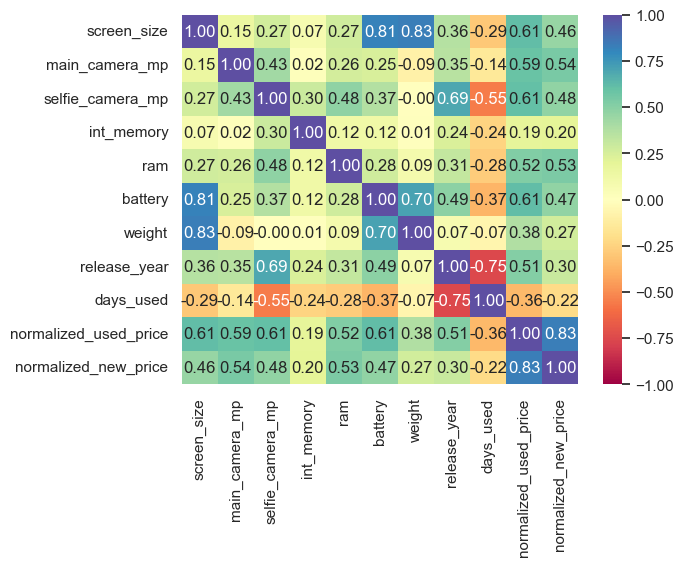

In [ ]:
# We create a list which looks at the data types of the columns and compilies based on whether they are numeric. 
num_cols = df12.select_dtypes(include=np.number).columns.tolist()

# We make a heat map, which takes the numeric columns, with annotations and the range of correlation is from -1 and 1.
# We also have the format of correlations be displayed with two decimal points. We also specify that cmap = "Spectral" 
#to specify the color range.
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

We re-create a heatmap to see if the correlation between numeric variables has changed and we notice, to our chargin, that the numbers haven't changed either. This is good is some ways as it can mean that the multicollinearity and linear relationship between variables hasn't been affected. 

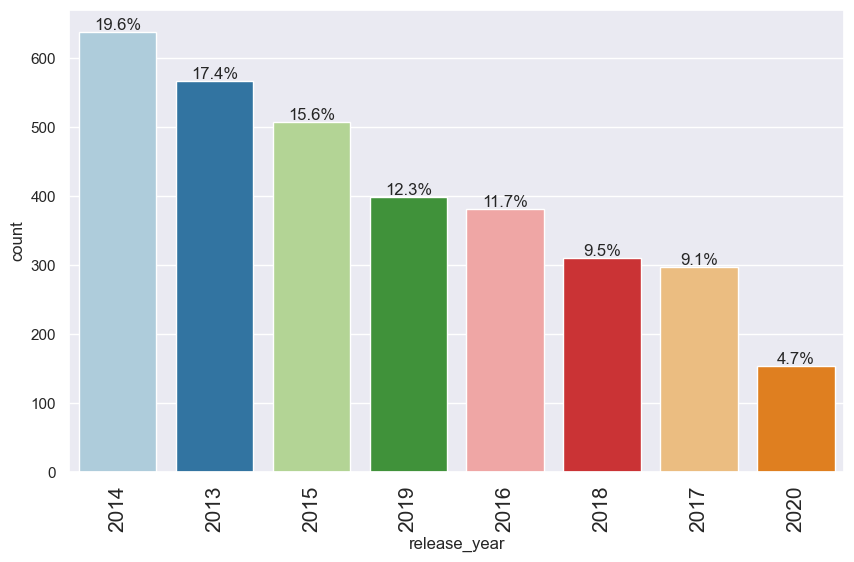

In [ ]:
# We use the labeled_barplot function to look at the 'release_year' of the 'df12' dataset. 'Perc = True' to 
# specify that we want the percentages. 
labeled_barplot(df12, 'release_year', perc = True)

We see that in the cleaned data, there's a lower percentage of devices that were issued in 2019 and 2016. However, we do see that the other years have increased in their respective porportions. 

In [ ]:
# We create a cross table of two of the variables of the cleaned dataset: '4g' and '5g'.
pd.crosstab(df12['4g'], df12['5g'])

5g,no,yes
4g,,
no,1105,0
yes,2063,85


We see that in the cleaned dataset, that 1105 devices are not 5g nor 4g. We also see that 2063 of the devices do use 4g while 85 devices do use both 4g and 5g. 

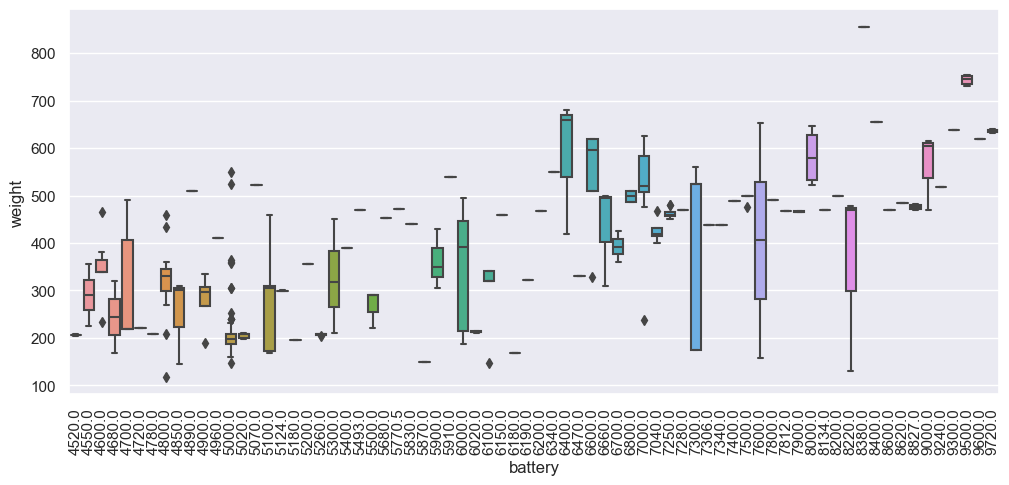

In [ ]:
# We create a sub-dataset named df13, which takes the cleaned dataset and and we specify that 
# the value in the 'battery' column to be greater than 4500. 
df13 = df12[df12['battery'] > 4500]

plt.figure(figsize=(12, 5))
# We create a boxplot using the df4 dataset (which has filtered cases where the battery value is greater than 4500, with 'battery' on the x-axis and 'weight' 
sns.boxplot(df4, x = 'battery', y = 'weight')
# We rotate the labels on the x-axis and rotate them 90 degrees 
plt.xticks(rotation = 90)
# Display the graph with no coding messages. 
plt.show()

From this graph, we see that the distribution of weight and battery has not been serioulsy affected. This could indicate that the only portions of the data seriously affected by our cleaning the data were cases that had the battery capacity less than 4500.

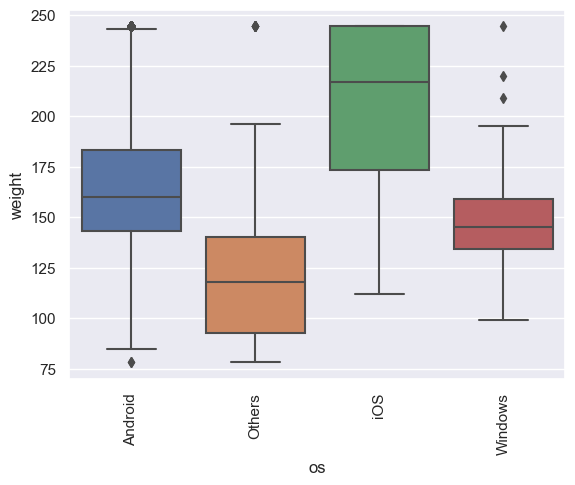

In [ ]:
# We create a boxplot, with 'os' on the x-axis and 'weight' on the y-axis. 
sns.boxplot(df12 , x = 'os', y = 'weight')
# We rotate the labels on the x-axis 90 degrees. 
plt.xticks(rotation = 90)
# Displays the graph with no coding messages.
plt.show()

From this graph, we see that the distributions of a majority of the operating systems has increased, with the exception of iOS. Interestingly, we notice that the median weight for devices has increased, especially for devices with an iOS operating system.

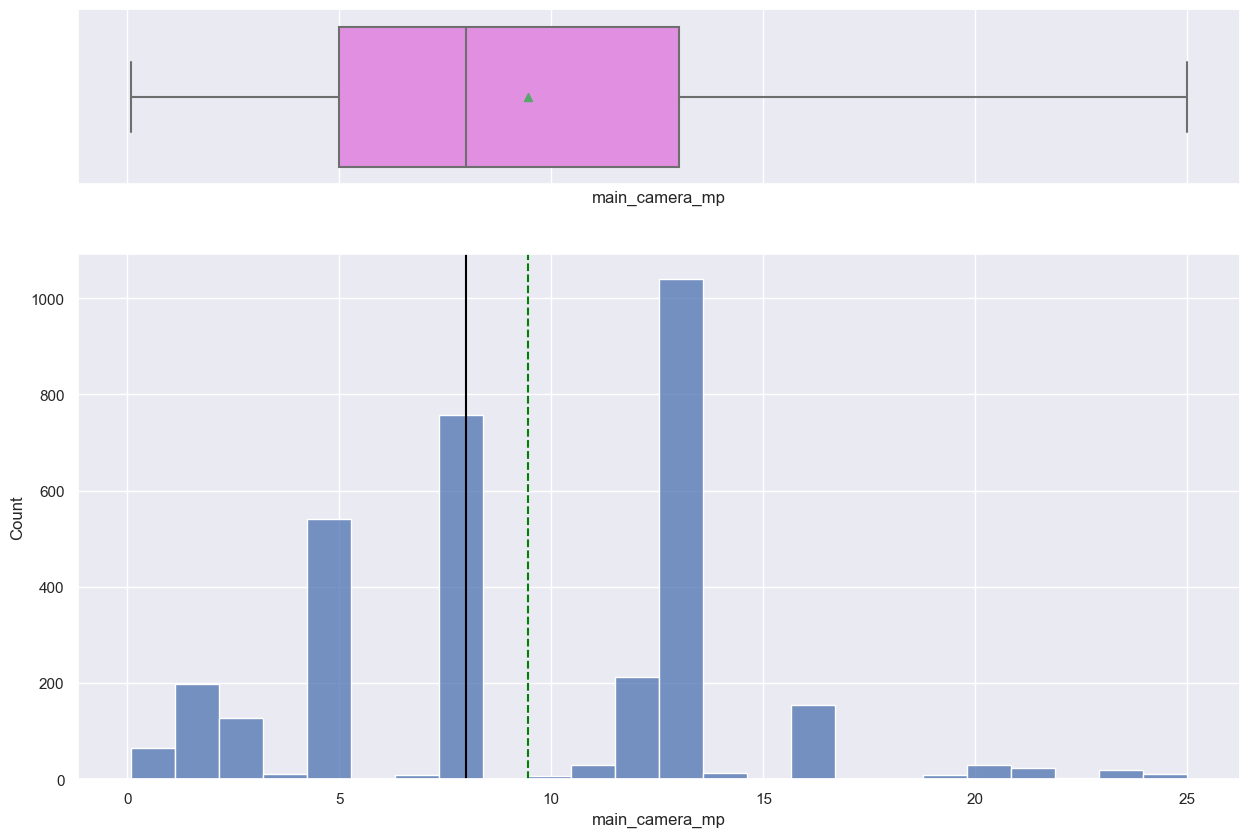

In [ ]:
# We create a combination of histogram and boxplot, looking at the 'main_camera_mp' variable in the cleaned dataset. 
histogram_boxplot(df12, 'main_camera_mp')

We see that the outliers have been removed from the 'main_camera_mp' column but there's not much a significant change from the prior graph. We do see that we've zoomed in on the distribution but that's it. 

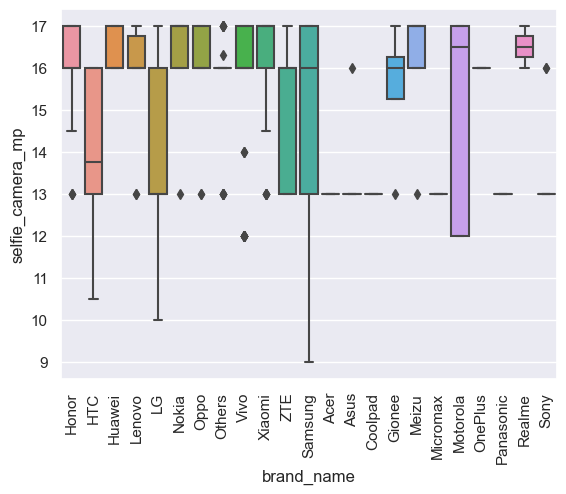

In [ ]:
# We make a subset of the data where the 'selfie_camera_mp' is to be greater than 8. 
df13 = df12[df12['selfie_camera_mp'] > 8]

# We create a boxplot graph to see whether the distribution of 'selfie_camera_mp' and 'brand_name'. 
# Taking the imported dataset, we have'brand_name' in the x-axis and 'selfie_camera_mp' in the y-axis. 
sns.boxplot(df13, x= 'brand_name', y= 'selfie_camera_mp')
# We rotate the labels in the x-axis so we can read the chart.
plt.xticks(rotation = 90)
# Display the chart with no coding messages. 
plt.show()

We reconstruct a graph we did earlier, to see whether there's any significant differences in terms of brand name and front camera resolution that is higher than 8 MP.In comparing the two graphs, we see that the distribution of a majority of the brand names have changed and that some brands are no longer part of our consideration. The two brands missing are Infinix and BlackBerry. We'll look into why later, but going back to the graph, we that the range of the camera resolution has decreased, which explains why the distribution looks so different after we removed the 'selfie_camera_mp' outliers. 

In [ ]:
# Looking at the copied data set (before we cleaned it) and filering it to cases where BlackBerry
# and Infinix, to see why the rows were removed from our df12 dataset. 

# We establish a variable that takes in 'BlackBerry' and 'Infinix'
brand_2 = ['BlackBerry', 'Infinix']

# We filter the df dataset and specify that we want to look at the cases where the value in 'brand_name' is present
# in the brand_2 variable.
df_brand_2 = df.loc[df['brand_name'].isin(brand_2)]

df_brand_2.shape # We see that the dataset created has 32 rows. 

# We see how many rows of the 'df_brand_2' dataset has null values, which turns out to be 14.
df_brand_2.isnull().sum()


brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           14
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# We drop the null values of the 'df_brand_2' dataset and name it 'df_brand_3'
df_brand_3 = df_brand_2.dropna()

# we look at the first 5 rows of the 'df_brand_3' dataset. 
df_brand_3.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
822,BlackBerry,Android,12.83,yes,no,12.0,8.0,32.0,4.0,4000.0,167.0,2017,561,4.578518,5.966275
823,BlackBerry,Android,12.83,yes,no,13.0,8.0,32.0,4.0,3000.0,178.0,2017,607,4.475175,5.301562
824,BlackBerry,Android,10.29,yes,no,12.0,8.0,64.0,4.0,3500.0,180.0,2017,554,4.682131,5.671982
825,BlackBerry,Android,12.83,yes,no,21.0,8.0,32.0,4.0,3000.0,165.0,2016,560,5.008099,5.701313
826,BlackBerry,Android,12.75,yes,no,13.0,8.0,16.0,4.0,2610.0,135.0,2016,920,4.346270,5.299117


In looking at the statistical summary table earlier, we notice that our normalized_new_price values exceeds all the 75th quartile value of the same column. Therefore, it is fair to presume that in removing those cases, we eliminated these rows when we used the treat_outliers() function on 'normalized_new_price'. 

## Model Building - Linear Regression

In [ ]:
# We specify that we want X to be the 'df12' dataset with 'normalized_used_price' column dropped, which we name 'X'
X = df12.drop(["normalized_used_price"], axis=1)
# We specify that we add a constant to the X variable.
X = sm.add_constant(X)

# We have 'y' be a variable which takes the 'normalized_used_price' column of the cleaned dataset.
y = df12["normalized_used_price"]



# We create a dummy variables of columns that contain 'object' type of data, so we can put the values on a best fit line.  
X_dummy = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True,
)




# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=1)

# We run a Linear Regression model on the y_train and x_train
olsmodel = sm.OLS(y_train, x_train).fit()
# We get a summary of the Linear Regression model. 
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     251.5
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:32:29   Log-Likelihood:                 212.65
No. Observations:                   2277   AIC:                            -329.3
Df Residuals:                       2229   BIC:                            -54.23
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


One of the first things we are given is the R-squared and Adjusted R squared values, which are remarkably high. This indicates that the model explains roughly 84%  of the data variance. We also see that certain variables have p-values significantly higher than 0.05. Since this latter value is typically our level of significance and the null hypothesis of each predictor variable is that the coeffiecient of the same variable is zero, we have to conclude that we have insufficient evidence to reject the null hypothesis in those cases. These cases includes battery, brand name, that they use a 5G network, and number of days the refurbished device has been used. 

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.220396,0.174556,0.841355,0.837937,4.101547


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227247,0.180416,0.829557,0.82779,4.293514


- The training $R^2$ is approximately 0.84, which makes it so the model is not underfitting.
- The RMSE and MAE results of the train and test data sets are close to the same, so the model is not overfitting. 
- The MAE of the model suggests that the model we made can predict the used price for a device within a mean error of 0.18 on the test data.
- The MAPE value of the test data indicates that we can predict within 4.29% of the normalized used price. 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

# 1) Multicollinearity Assumption

In [ ]:
# The first assumption we check is that there is no multicollinearity. 
# We check for this by first creating a VIF function.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


We create a function to check the predictor variables of multicollinearity. We do this by usng the variance inflation formula and looking at the values for each variable. 

In [ ]:
#Using the checking_vif() function to give us the x_train VIF values. 
checking_vif(x_train)


,feature,VIF
0,const,4.321065e+06
1,screen_size,5.071482e+00
2,main_camera_mp,2.488001e+00
3,selfie_camera_mp,3.775065e+00
4,int_memory,2.134435e+00
5,ram,1.958244e+00
6,battery,3.667928e+00
7,weight,4.380950e+00
8,release_year,5.064861e+00
9,days_used,2.278840e+00


We see that the VIF values are high for certain values under 'brand_name', 'os', and the 'screen_size' column. However, we need to keep in mind what they communicate to us and what we should do with that information. A majority of the data shows a VIF value that is close to one, displaying no correlation between their respective predictor variables and other variables in the dataset. There are cases where the values are the VIF exceeds 1 and approaches 10 (signs of high multicollinearity). Coincidentially, most of these columns have a high p-value, so we know dropping some of these columns will actually improve our model. 

In [ ]:
# We specify 'brand_name' as a value of the variable 'col_to_drop'.
col_to_drop = "brand_name"
# We make a dataset named 'X_train2', which takes the x_train dataset we created
# earlier and drops the columns that start with the value in the 'col_to_drop' variable.
# In simplier terms, it removes columns of the x_train that starts with 'brand_name' in 
# the column names. 
X_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
X_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]


# We check the VIF after dropping the 'brand_name' column. 
vif = checking_vif(X_train2)
# We print the VIF values.  
vif

,feature,VIF
0,const,3.970365e+06
1,screen_size,4.786154e+00
2,main_camera_mp,2.154221e+00
3,selfie_camera_mp,3.401103e+00
4,int_memory,1.851109e+00
5,ram,1.811526e+00
6,battery,3.542870e+00
7,weight,4.139540e+00
8,release_year,4.654297e+00
9,days_used,2.205467e+00


In [ ]:
After removing the columns referencing brand names, we see that the VIF values have significantly dropped.
This confirms that removing brand names helps us maintain no multicollinearity. 

We also drop the variables that have a high p-value in the model as they provided a lack of statistical evidence that the coefficient for these variables are not equal to zero. This includes battery, 5g network, operating system, and the number of days an refurbished device has been used. 

In [ ]:
# We create a new dataset named 'x_train3' and we drop the 'battery', '5g_yes', 'days_used', 'os_iOS', 'os_Windows',
# and 'os_Others' columns. 
x_train3 = X_train2.drop([ "battery", "5g_yes", "days_used", "os_iOS", "os_Windows", "os_Others"], axis=1)  
# We drop the same columns to the X_test2 dataset and name it "y_test3"
y_test3 = X_test2.drop(["battery", "5g_yes", "days_used", "os_iOS", "os_Windows", "os_Others"], axis=1)

# We make a new Linear Regression model using the new train dataset. We name this Linear Regression model 'olsmodel2' 
olsmodel2 = sm.OLS(y_train, x_train3).fit()
# We print the summary of the new Linear Regression model.
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1310.
Date:                   Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                           17:00:47   Log-Likelihood:                 193.87
No. Observations:                   2277   AIC:                            -367.7
Df Residuals:                       2267   BIC:                            -310.4
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

# 2) Linearity Assumption & 
# 3) Independence assumption

Now we need to check regarding the Linearity of the remaining variables and independence of error terms. We do this by creating a plot of fitted values vs residuals and analyzing the graph. 

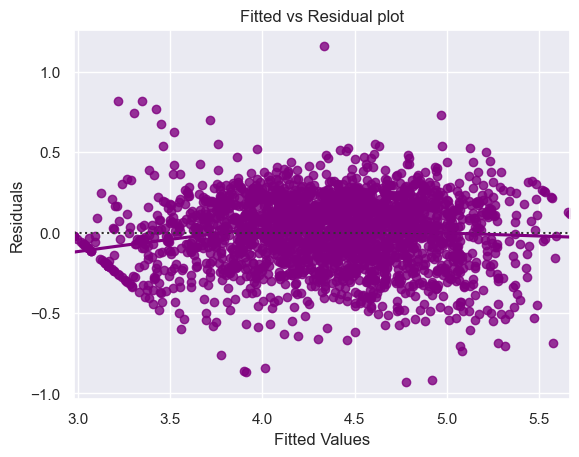

In [ ]:
# We first make a data fram with actual, fitted, and residual values. 
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

# Now we make a plot of these values. 
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
# We label the x-axis "Fitted Values"
plt.xlabel("Fitted Values")
# We label the y-axis "Residuals"
plt.ylabel("Residuals")
# We have the title of the graph "Fitted vs Residual plot"
plt.title("Fitted vs Residual plot")
# Shows the graph with no coding messages. 
plt.show()


While we do see a mass of data points, we can't distinguish a distinct pattern in the fitted values vs residuals. Therefore, we can resasonably say that the assumptions of linearity and independence are satisified.  

# 4) Normality assumption

We then try to test for normality of the error terms.

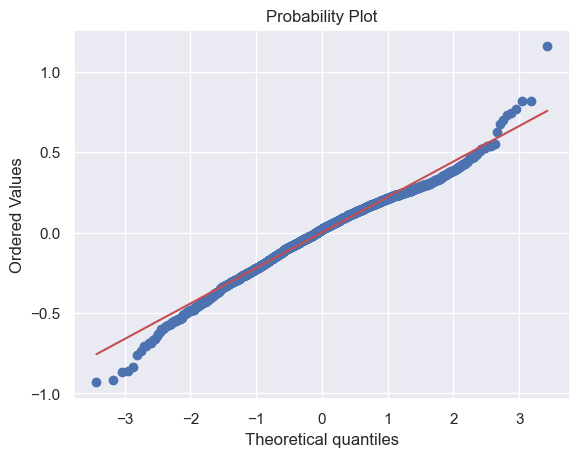

In [ ]:
# Necessary packages in order to make a Q-Q Plot. 
import pylab
import scipy.stats as stats

# Code to make a Q-Q Plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
# Displays the graph with no coding messages. 
plt.show()

From the Q-Q Plot of residuals, we see that the data looks mostly normal but 
there's parts when the residuals are not on the slanted line. To further test whether the data follows a normal distribtuion, we use the Shapiro-Wilk test. 

In [ ]:
# Code to run the Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9858964681625366, pvalue=3.170906801562047e-14)

Unfortunately, we see that the p-value of the Shapiro-Wilk test is significantly smaller than 0.05, meaning that the data is does not qualify as normal under this test. However, the Q-Q plot suggests to us that the data is normal. To determine which argument of normality we should go with, we create a distribution plot. 

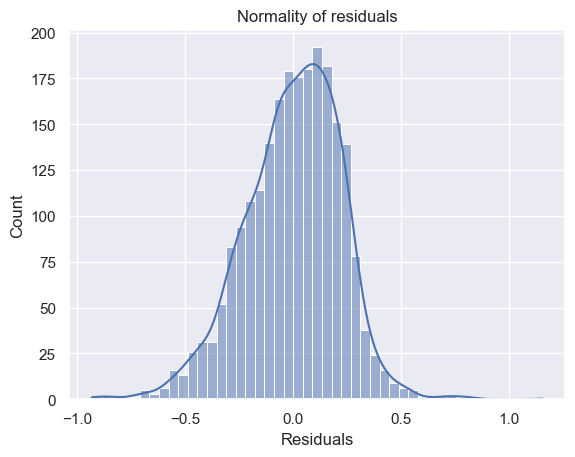

In [ ]:
# We make a histogram of the data, looking at the df_pred dataset and having the x-axis be 'Residuals' values.
sns.histplot(data=df_pred, x="Residuals", kde=True)
# We specify the title of the graph to be "Normality of Residuals"
plt.title("Normality of Residuals")
# We display the graph with no coding messages. 
plt.show()

In this graph, we see that the residuals form a bell-shape distribution. Therefore, using two of the three methods testing for normality, we conclude that the assumption that the residuals are normally distributed are satisified. 

# 5) Homoscedasticity assumption

We have now proved four of the five Linear Regression assumptions: normality of error terms, Independence of normal terms, linearity of variables, and no multicollinearity.  Our final test is to determine homoscedasticity. 

We test homoscedasticity by using the Goldfeldquandt test. If the p-value is greater than 0.05, then can say that the residuals are homoscedastic (equal variance). 

In [ ]:
# We import the necessary packages to run the goldfeldquandt test. 
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# We make a variable named 'name' which takes the specified string values.
name = ["F statistic", "p-value"]
# We create a variable named 'test' which contains the goldfeldquandt test. 
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
# We then run the Goldfeldquandt test. 
lzip(name, test)

[('F statistic', 1.0710732999676824), ('p-value', 0.12447171161730092)]

We have a p-value of 0.124, which is greater than 0.05. Thus, we can say we have sufficient evidence that the residuals are homoscedastic and we have satisfied all assumptions of Linear Regression. 

## Final Model

In [1]:
# Prints the summary of the Linear Regression model. 
print(olsmodel2.summary())

NameError: ignored

## Actionable Insights and Recommendations 

- A unit increase of  the device's screen size ('screen_size') increases the normalized used price by 0.0372 . 
- A unit increase of the resolution of the rear camera ('main_camera_mp') of the device increases normalized used price by 0.235 .
- A unit increase of the front camera resolution ('selfie_camera_mp') of the device increases its normalized used price by 0.0107 .
- A unit increase of the internal memory ('int_memory') of the device increases its normalized used price by 0.0005 .
- A unit increase of the device's ram ('ram') increases its normalized used price by 0.0097 . 
- A unit increase of the device's weight('weight') increases its normalized used price by 0.0017 .
- A unit in how recent a device was released ('release_year') increases its normalized used price by 0.0116 . 
- A unit increase of the device's nomralized new price ('normalized_new_price') increases the normalized used price by 0.3951 . 
- If a device has 4G, it increases the device's normalized used price by 0.0414 .
- The more recently a device was released and the higher the normalized the new price of the device, the higher the normalized used price will be. 



___